In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('cleaned_agrifood_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 60 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          985 non-null    object 
 1   Year                                             985 non-null    int64  
 2   Emissions (CH4)_Agrifood Systems Waste Disposal  985 non-null    float64
 3   Emissions (CO2)_Agrifood Systems Waste Disposal  985 non-null    float64
 4   Emissions (N2O)_Agrifood Systems Waste Disposal  985 non-null    float64
 5   Emissions (CH4)_Burning - Crop residues          985 non-null    float64
 6   Emissions (N2O)_Burning - Crop residues          985 non-null    float64
 7   Emissions (N2O)_Crop Residues                    985 non-null    float64
 8   Emissions (CO2)_Drained organic soils (CO2)      985 non-null    float64
 9   Emissions (N2O)_Drained organic 

Top 10 features with smallest p-values:
Emissions (CH4)_Rice Cultivation - 0.012101246210409557
Emissions (N2O)_Forest fires - 0.013053966070082265
Emissions (CH4)_Food Transport - 0.01317921407183046
Emissions (CH4)_Food Retail - 0.015063097556695841
Emissions (N2O)_Food Retail - 0.017397551167493124
Emissions (CO2)_Food Retail - 0.02146928179090198
Emissions (CO2)_Food Transport - 0.022972028114981037
Emissions (CH4)_Pesticides Manufacturing - 0.02455733504825294
Emissions (N2O)_Food Transport - 0.026885908946615744
Emissions (CO2)_Pesticides Manufacturing - 0.03334801385409306


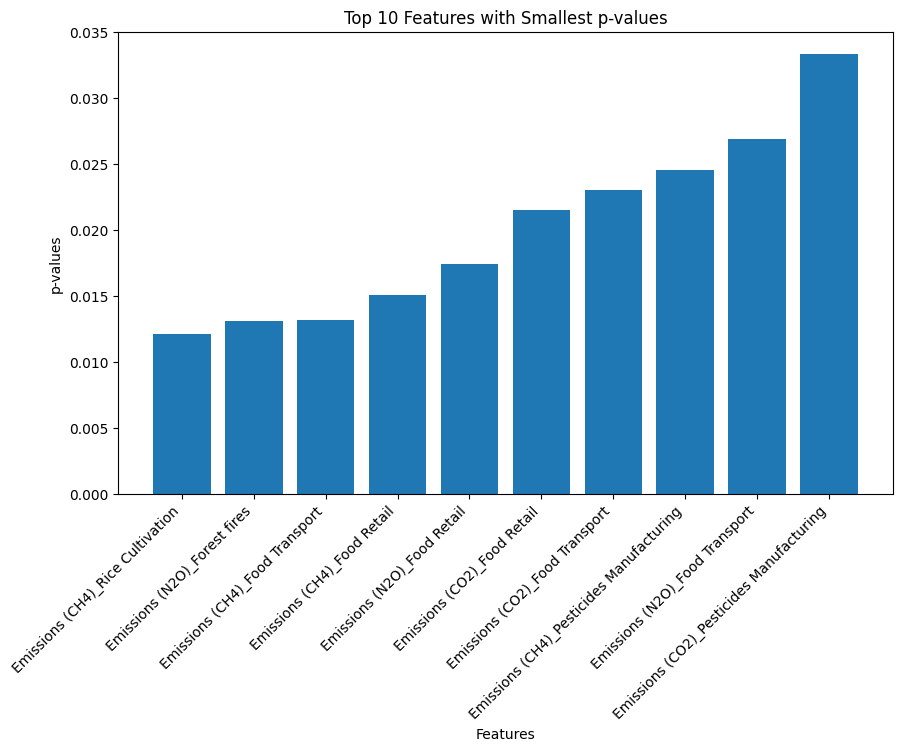

In [5]:
from scipy.stats import f_oneway

target_variable = df['Surface Temperature']
features = df.drop(columns=['Surface Temperature','Country','Year','Temperature Index','Rice Production(Tonne)'])

p_values = {}

for feature in features.columns:
    statistic, p_value = f_oneway(*[group[1] for group in df.groupby('Surface Temperature')[feature]])
    p_values[feature] = p_value

top_10_features = sorted(p_values, key=p_values.get)[:10]

print("Top 10 features with smallest p-values:")
for feature in top_10_features:
    print(feature, "-", p_values[feature])

features_list = []
p_values_list = []

for feature in top_10_features:
    features_list.append(feature)
    p_values_list.append(p_values[feature])

plt.figure(figsize=(10, 6))
plt.bar(features_list, p_values_list)
plt.xlabel('Features')
plt.ylabel('p-values')
plt.title('Top 10 Features with Smallest p-values')
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 features correlated with Rice Production(Tonne):
Emissions (N2O)_Crop Residues                      0.977663
Emissions (N2O)_Burning - Crop residues            0.975934
Emissions (CH4)_Burning - Crop residues            0.975934
Emissions (CH4)_Rice Cultivation                   0.969274
Emissions (CH4)_Agrifood Systems Waste Disposal    0.961576
Emissions (N2O)_Waste                              0.952430
Emissions (N2O)_Synthetic Fertilizers              0.945788
Emissions (CH4)_Manure Management                  0.945060
Emissions (N2O)_Manure applied to Soils            0.940012
Emissions (CH4)_Waste                              0.934382
Name: Rice Production(Tonne), dtype: float64


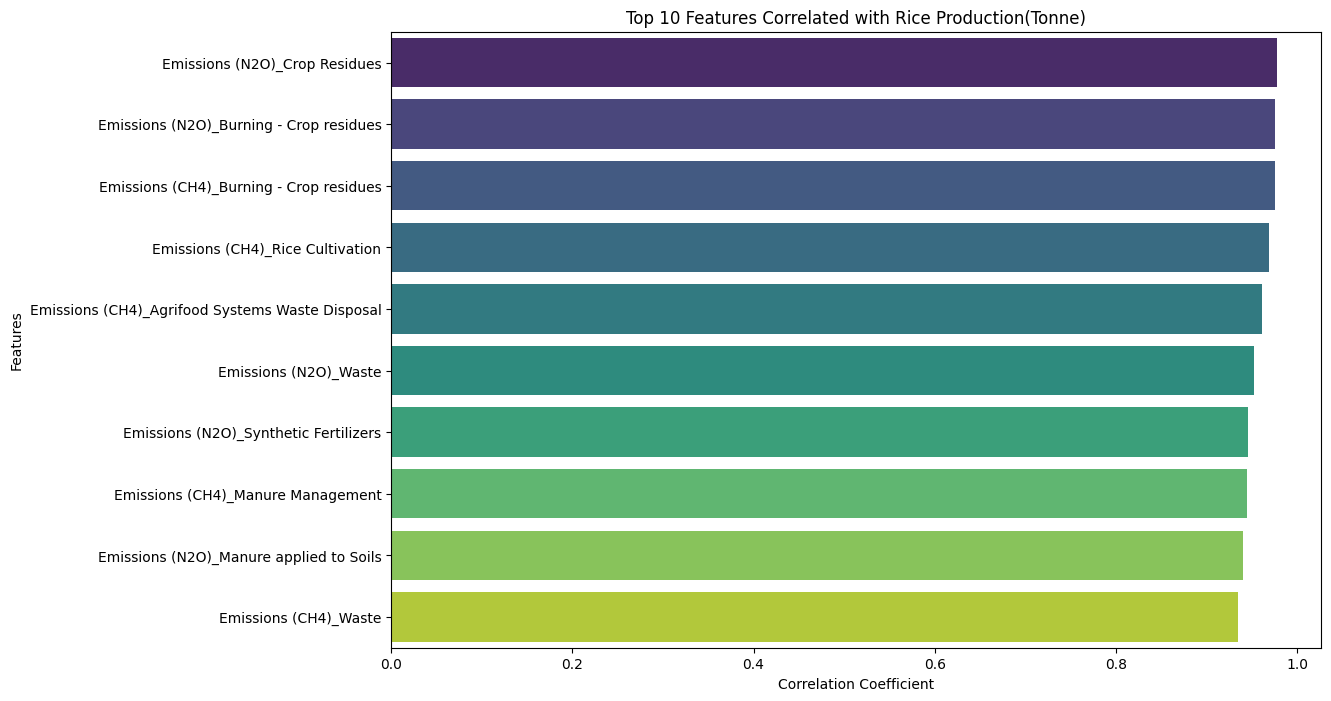

In [6]:
# Calculate the correlation matrix excluding 'Country', 'Year', and 'Surface Temperature'
correlation_matrix = df.drop(columns=['Country', 'Year', 'Surface Temperature']).corr()

# Get the correlation of 'Rice Production(Tonne)' with other features
rice_correlation = correlation_matrix['Rice Production(Tonne)'].drop(['Rice Production(Tonne)'])

# Select the top 10 features with the highest correlation
top_10_features = rice_correlation.abs().nlargest(10).index
top_10_correlation = rice_correlation[top_10_features]

# Print the top 10 correlated features
print("Top 10 features correlated with Rice Production(Tonne):")
print(top_10_correlation)

# Plotting the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_correlation.values, y=top_10_correlation.index, palette='viridis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Top 10 Features Correlated with Rice Production(Tonne)')
plt.show()

In [7]:
columns = ['Country', 'Year'] + list(top_10_features) + ['Rice Production(Tonne)']
df = df[columns]

In [8]:
df.head(5)

Country  Year  Emissions (N2O)_Crop Residues  \
0  Afghanistan  1991                         0.7906   
1  Afghanistan  1992                         0.7416   
2  Afghanistan  1993                         0.8710   
3  Afghanistan  1994                         0.9134   
4  Afghanistan  1995                         0.9201   

   Emissions (N2O)_Burning - Crop residues  \
0                                   0.0716   
1                                   0.0656   
2                                   0.0796   
3                                   0.0840   
4                                   0.0830   

   Emissions (CH4)_Burning - Crop residues  Emissions (CH4)_Rice Cultivation  \
0                                   2.7606                             24.22   
1                                   2.5314                             24.50   
2                                   3.0714                             24.50   
3                                   3.2408                             25.20   
4                                   3.2016                             23.80   

   Emissions (CH4)_Agrifood Systems Waste Disposal  Emissions (N2O)_Waste  \
0                                          28.7648                  0.368   
1                                          29.9255                  0.383   
2                                          31.3371                  0.412   
3                                          32.7076                  0.433   
4                                          33.8030                  0.466   

   Emissions (N2O)_Synthetic Fertilizers  Emissions (CH4)_Manure Management  \
0                                0.89120                             9.3445   
1                                0.81000                             9.6669   
2                                0.83290                             9.8348   
3                                0.10930                            10.3563   
4                                0.10826                            11.4072   

   Emissions (N2O)_Manure applied to Soils  Emissions (CH4)_Waste  \
0                                   1.0137                   62.7   
1                                   0.9992                   67.4   
2                                   0.9876                   72.6   
3                                   1.0099                   77.8   
4                                   1.0386                   82.2   

   Rice Production(Tonne)  
0                335000.0  
1                300000.0  
2                300000.0  
3                342000.0  
4                390000.0

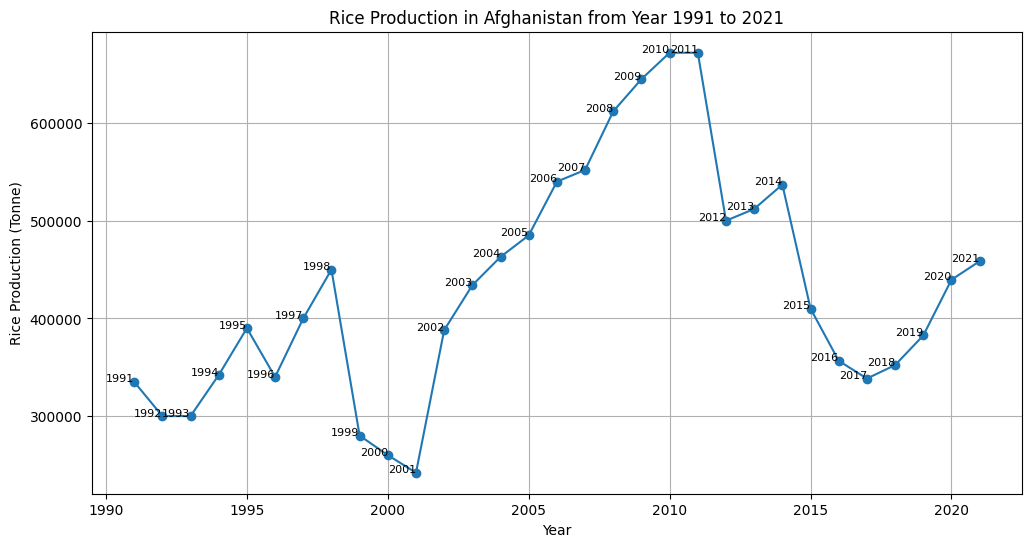

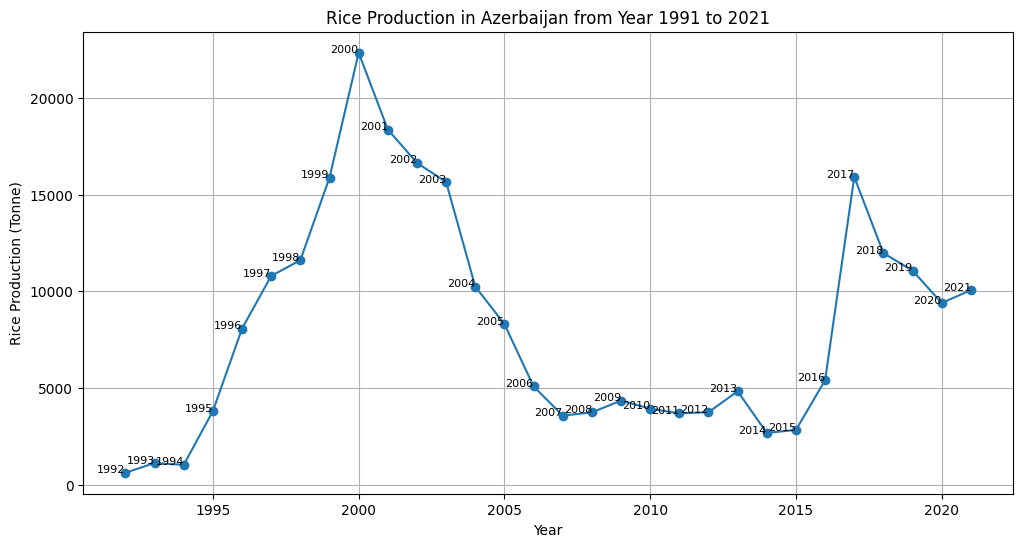

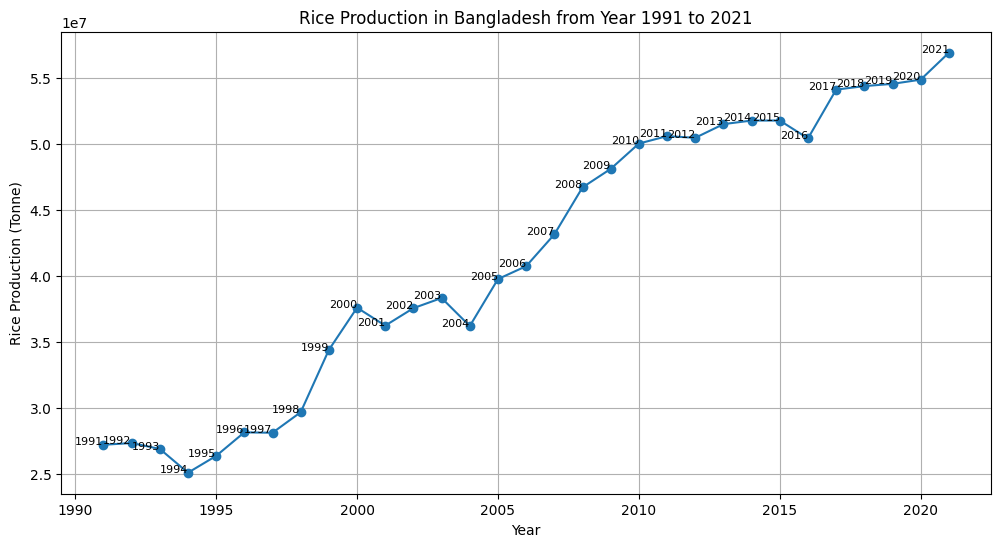

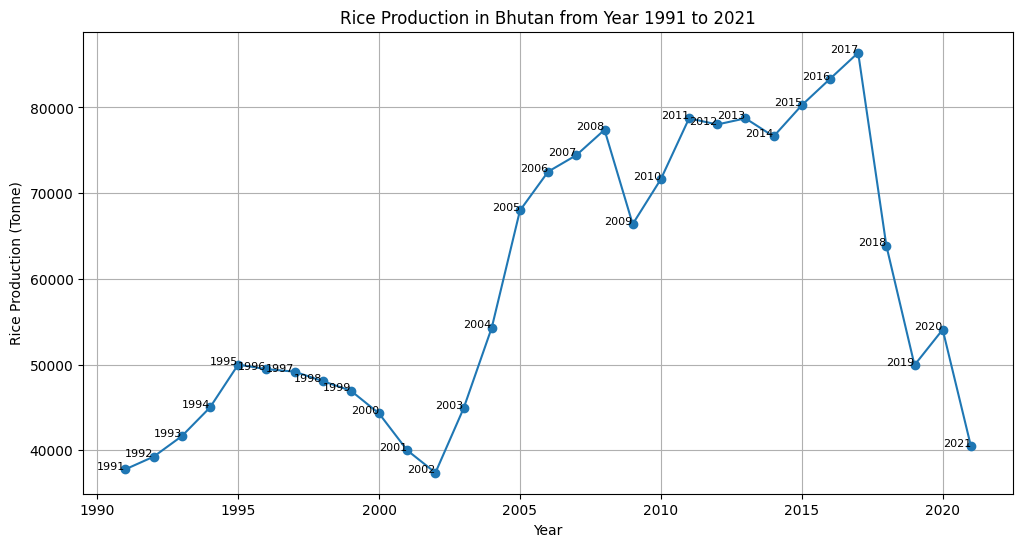

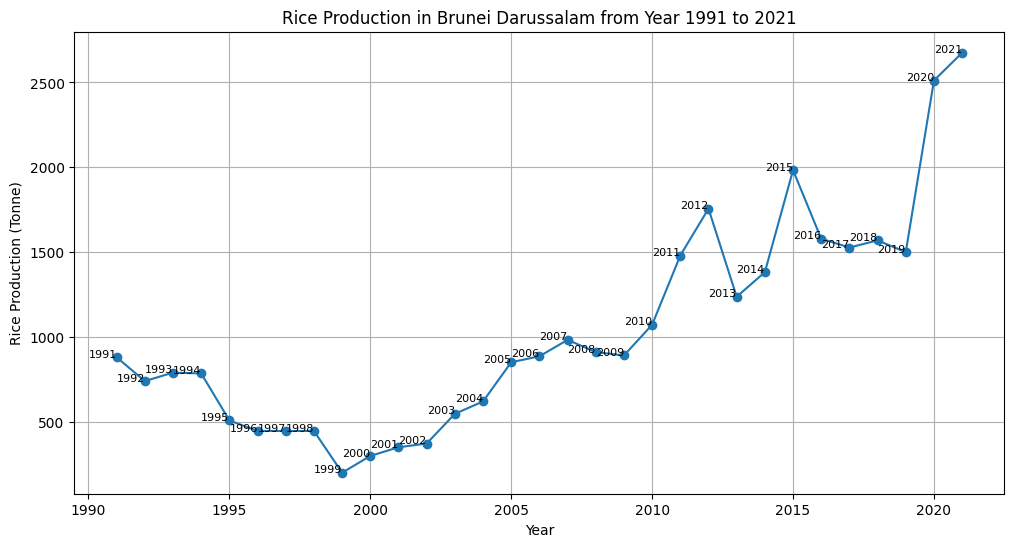

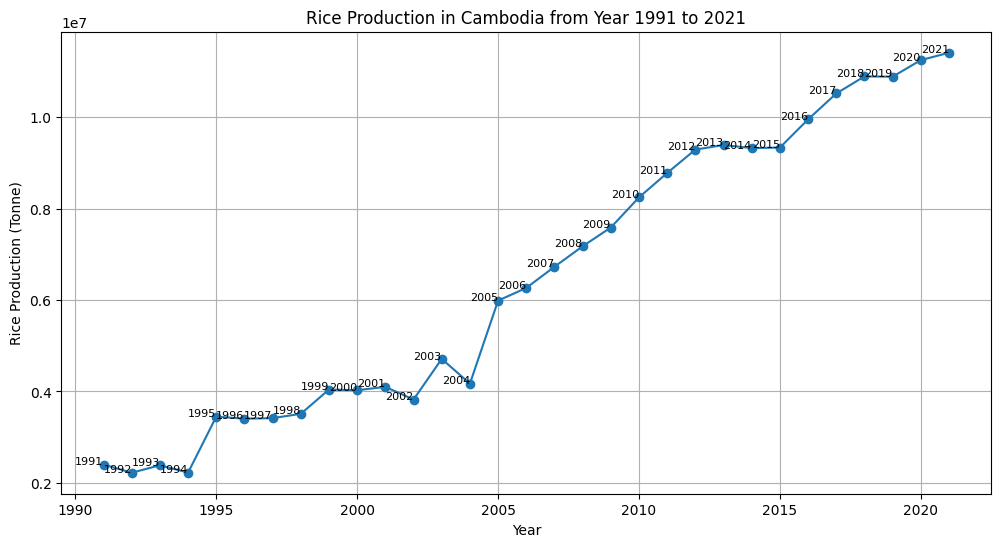

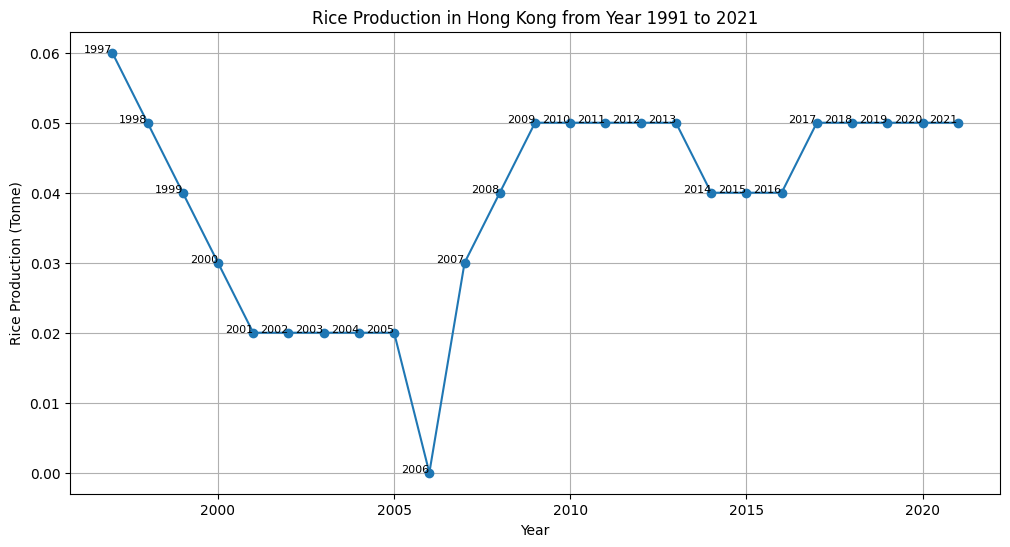

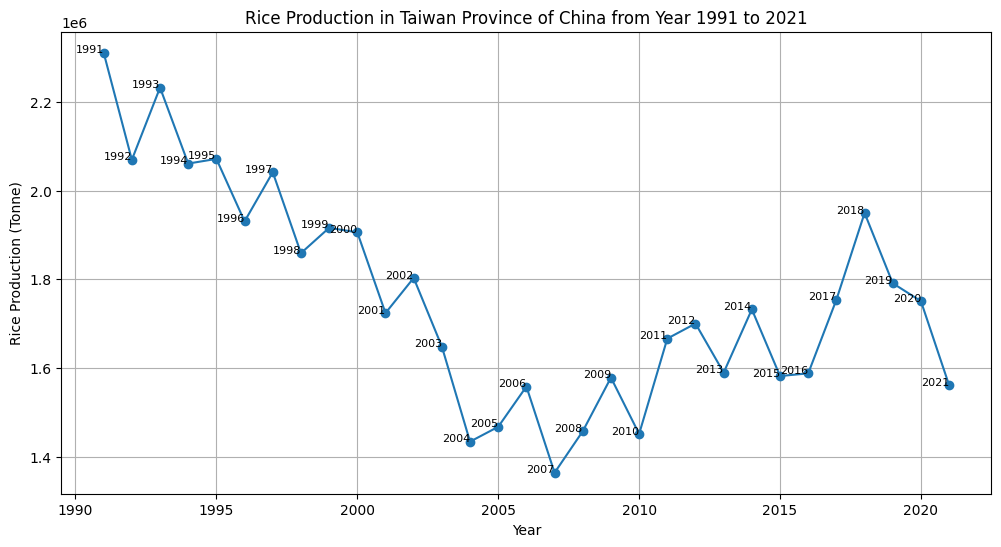

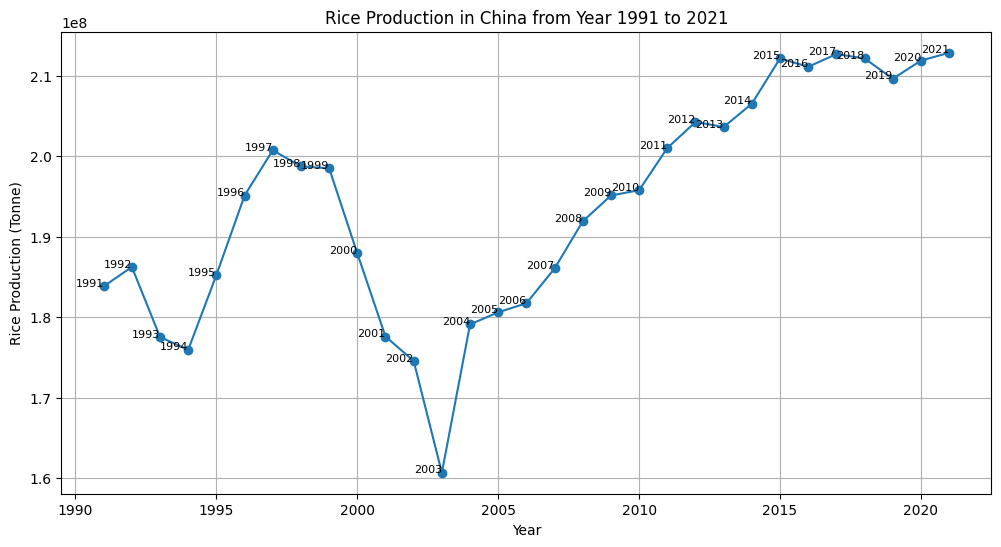

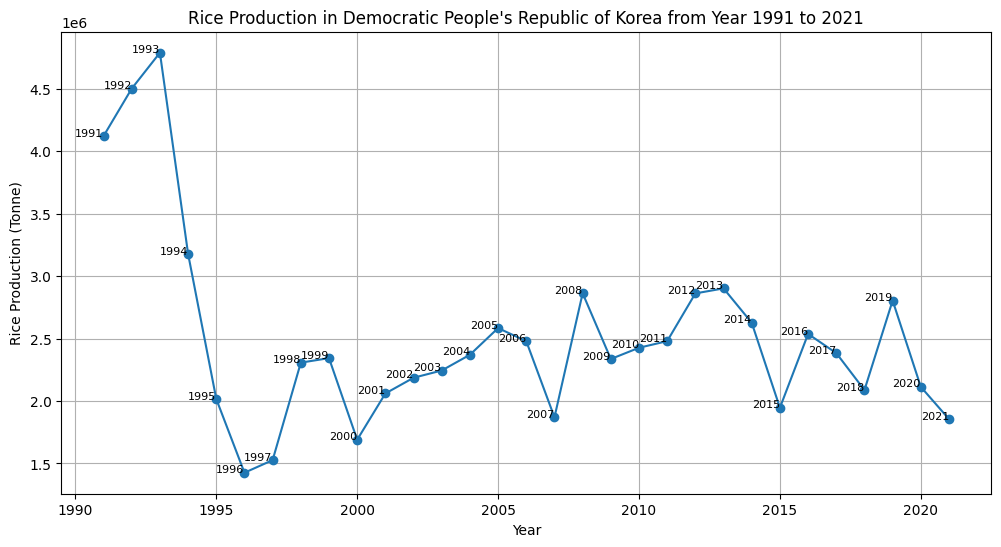

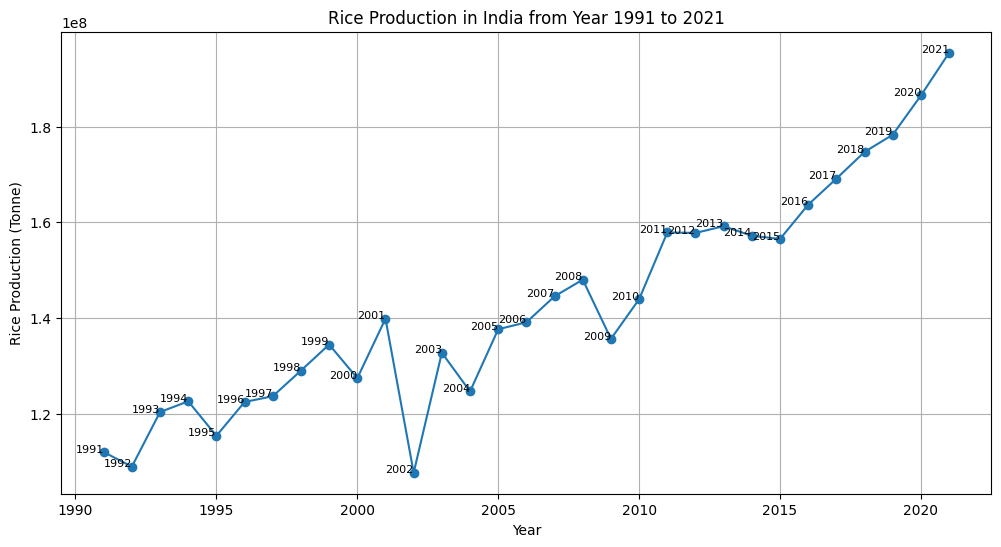

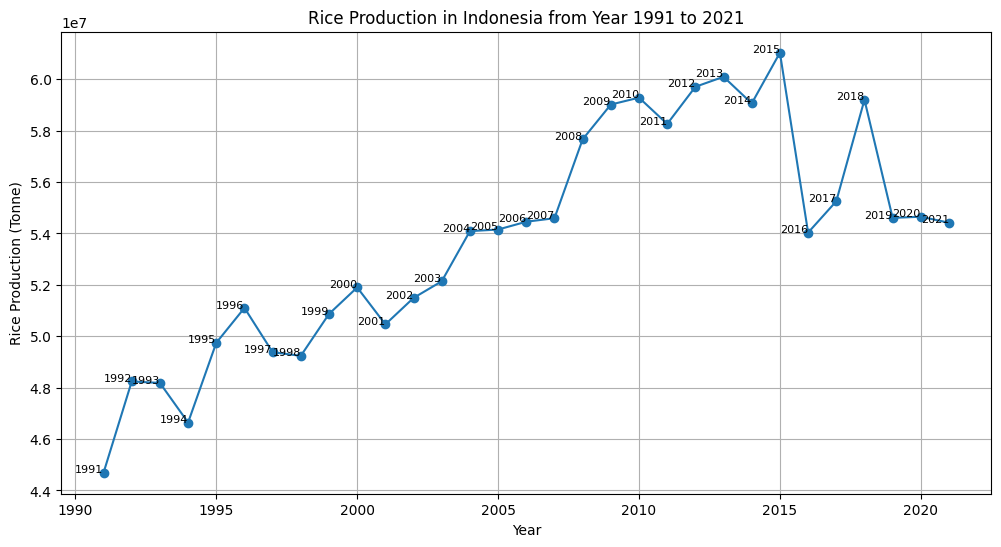

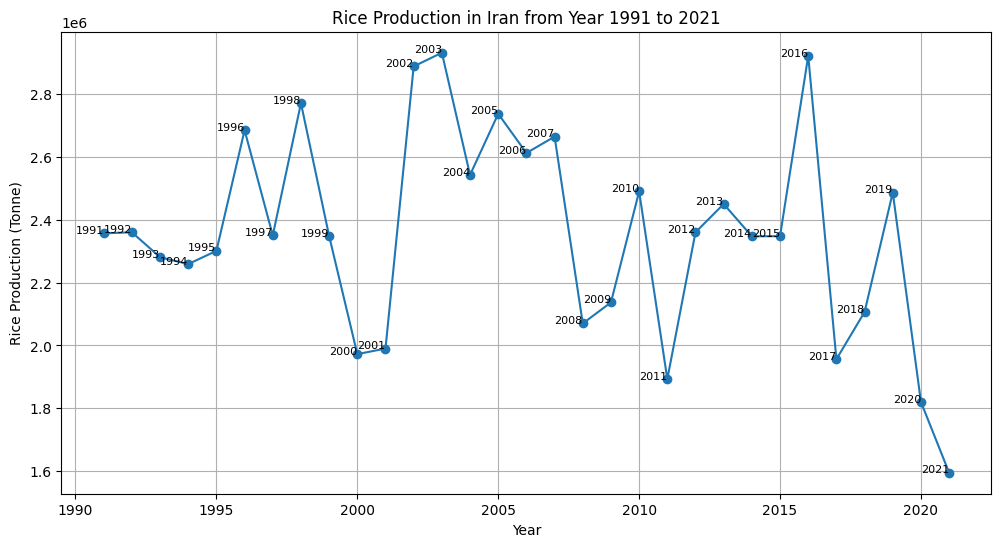

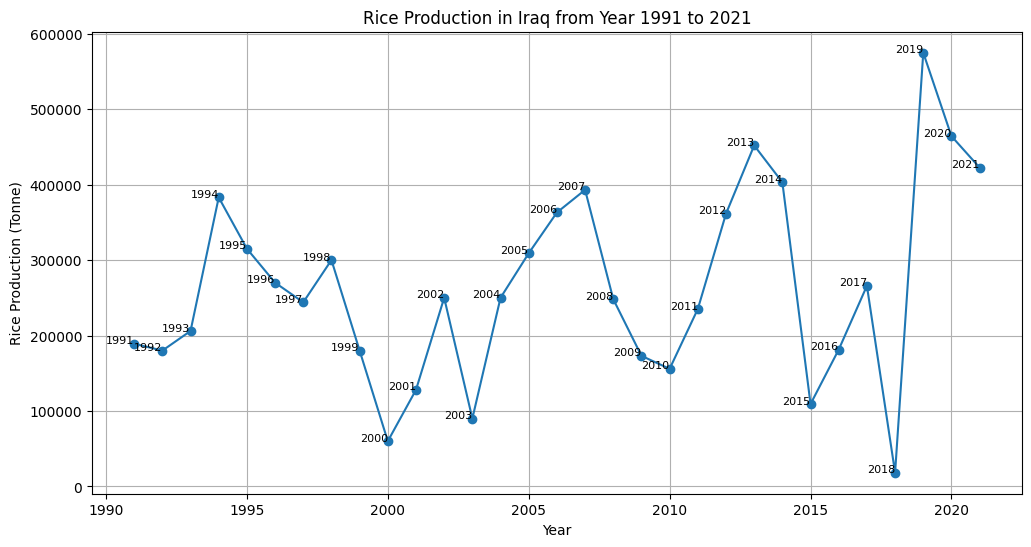

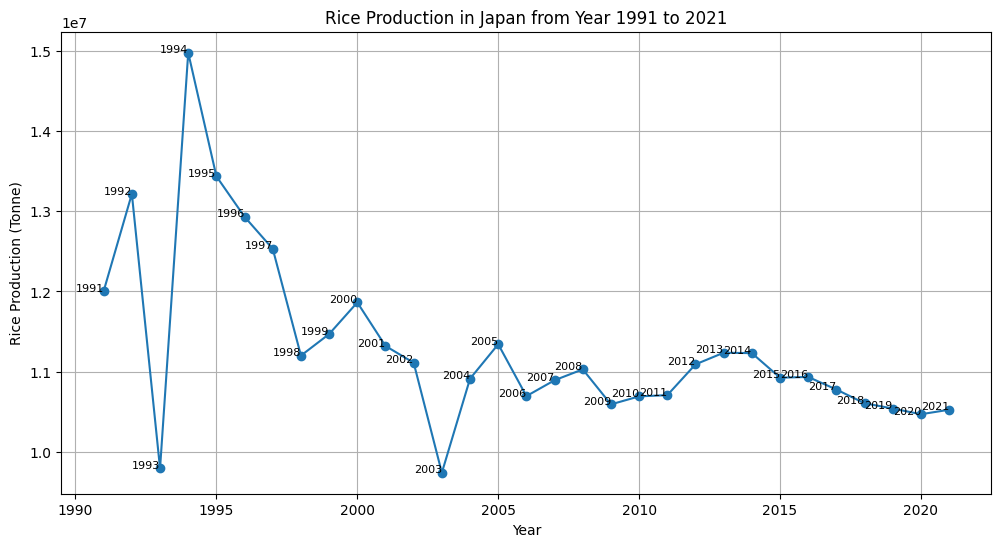

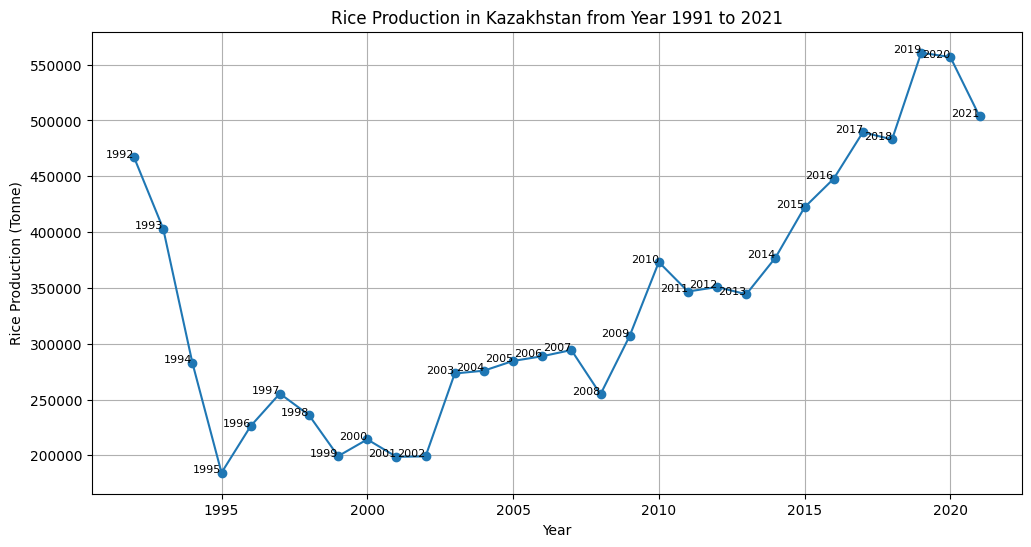

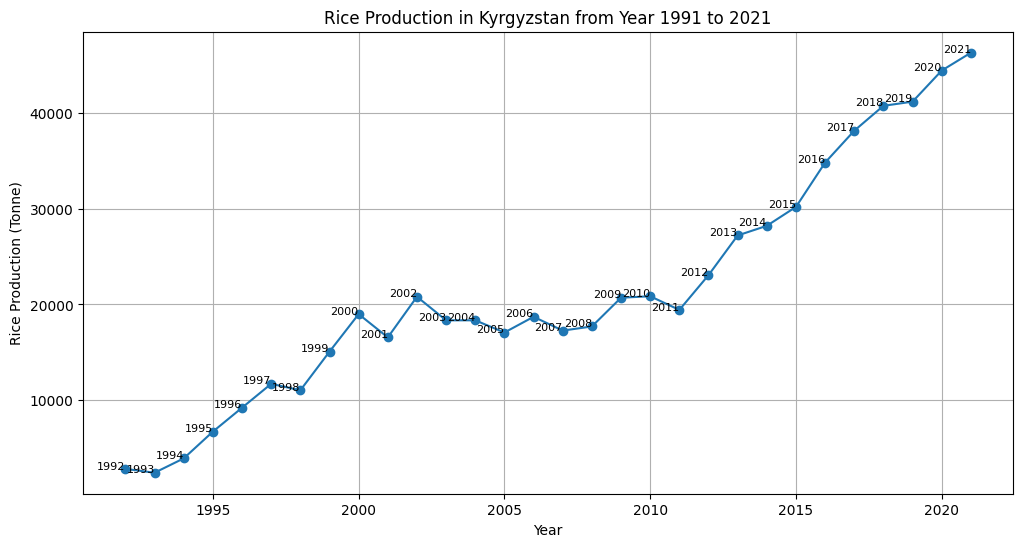

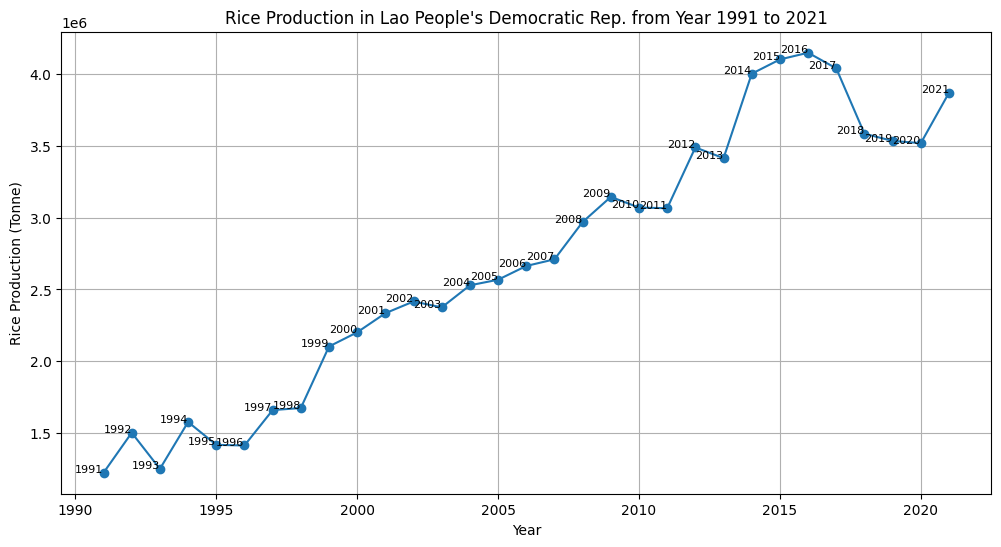

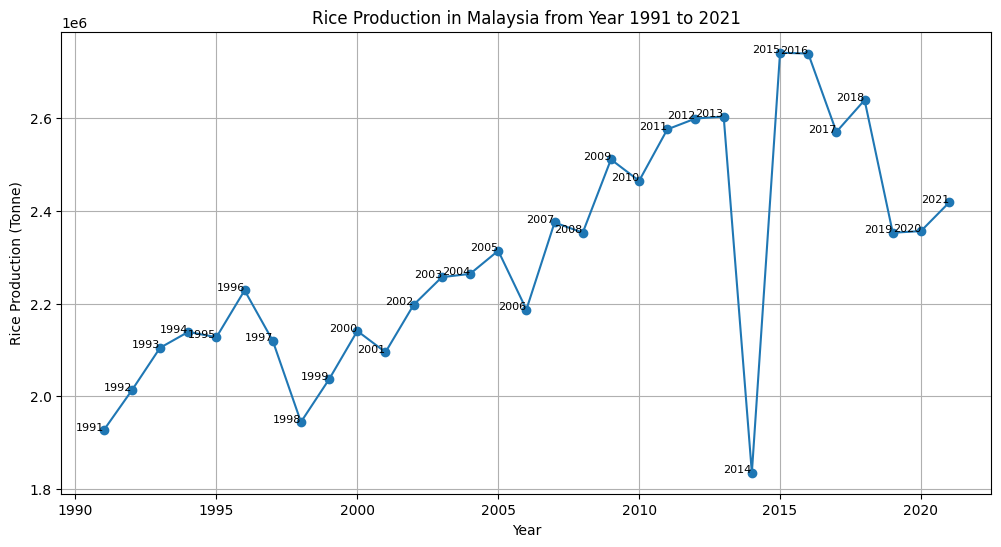

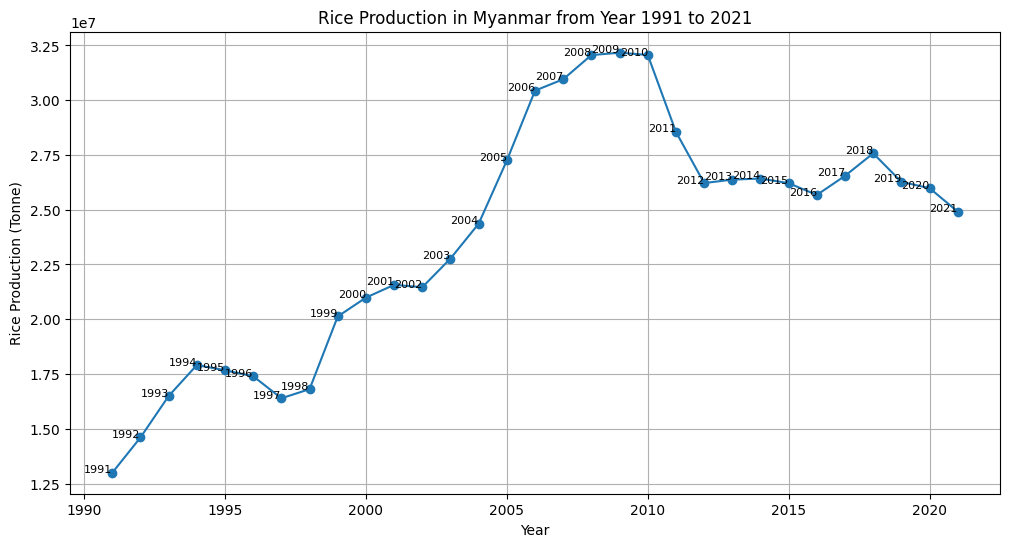

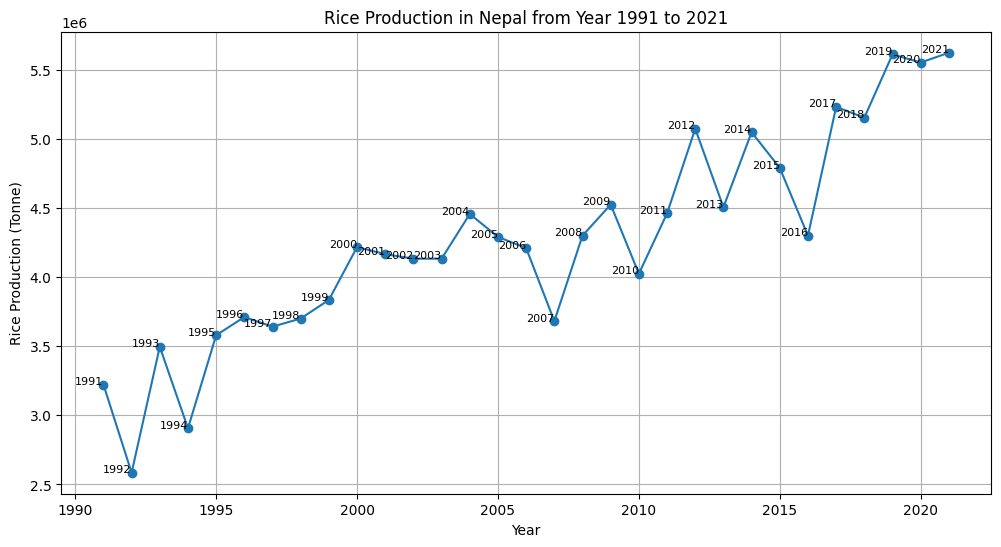

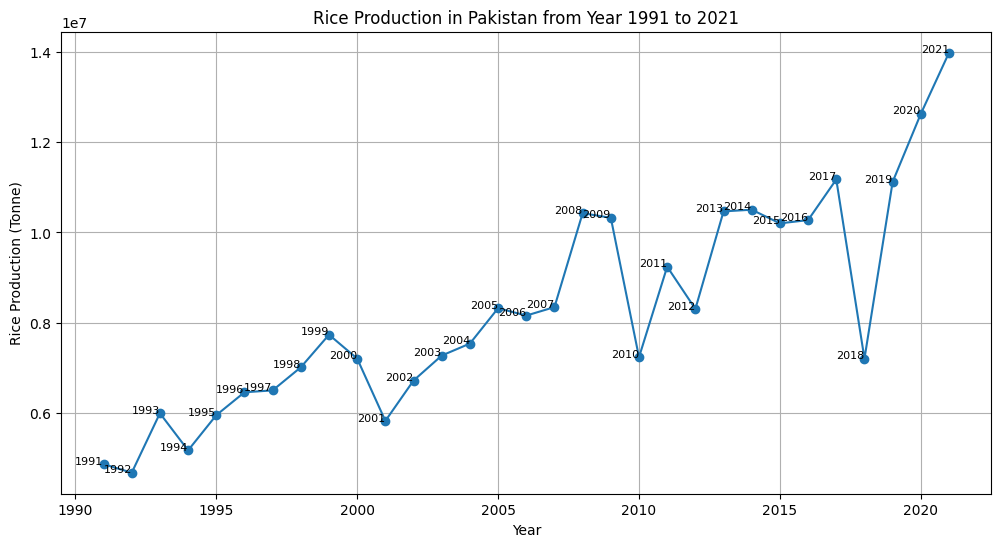

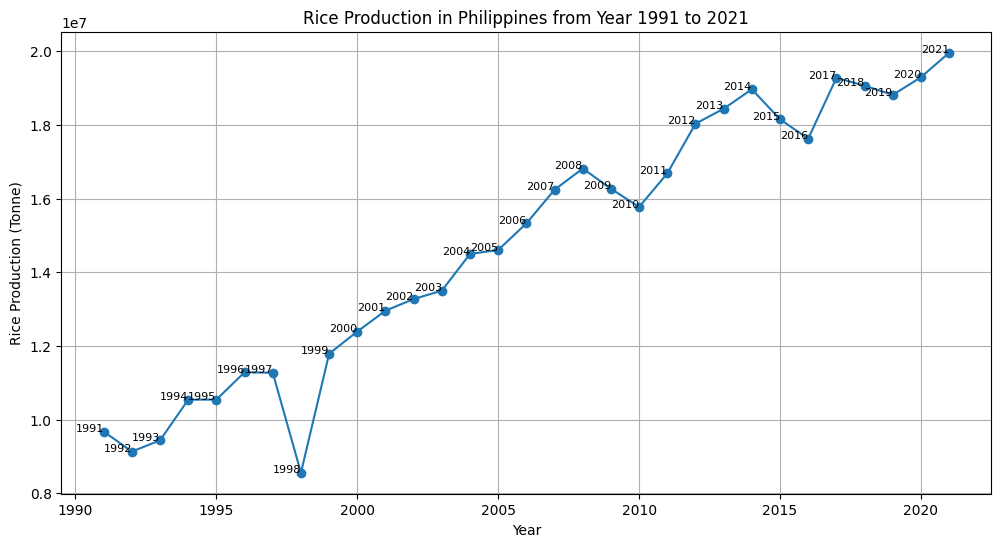

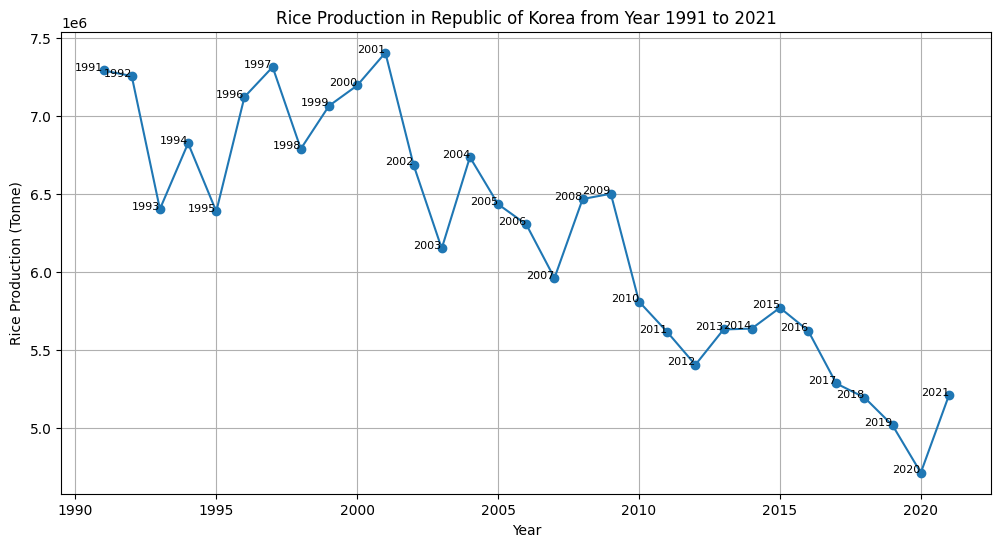

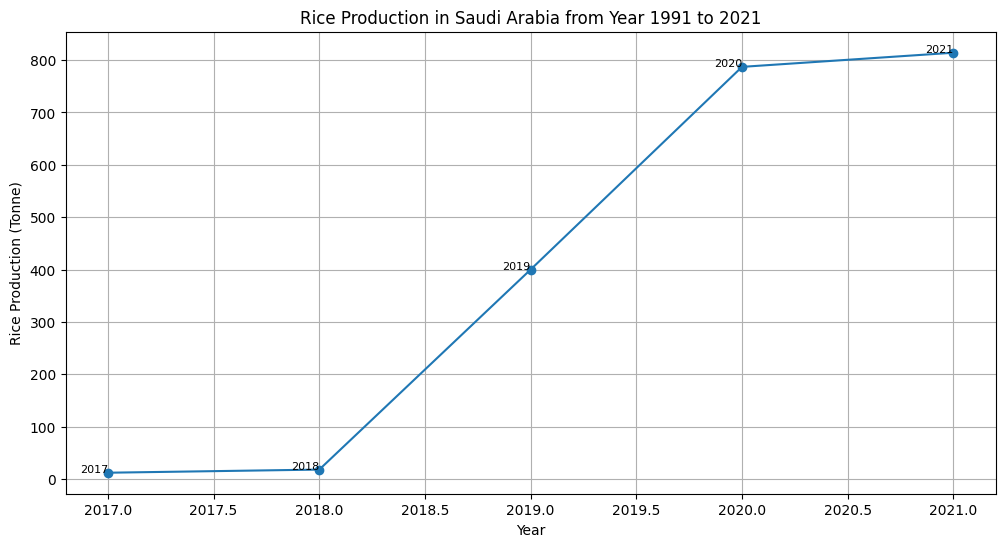

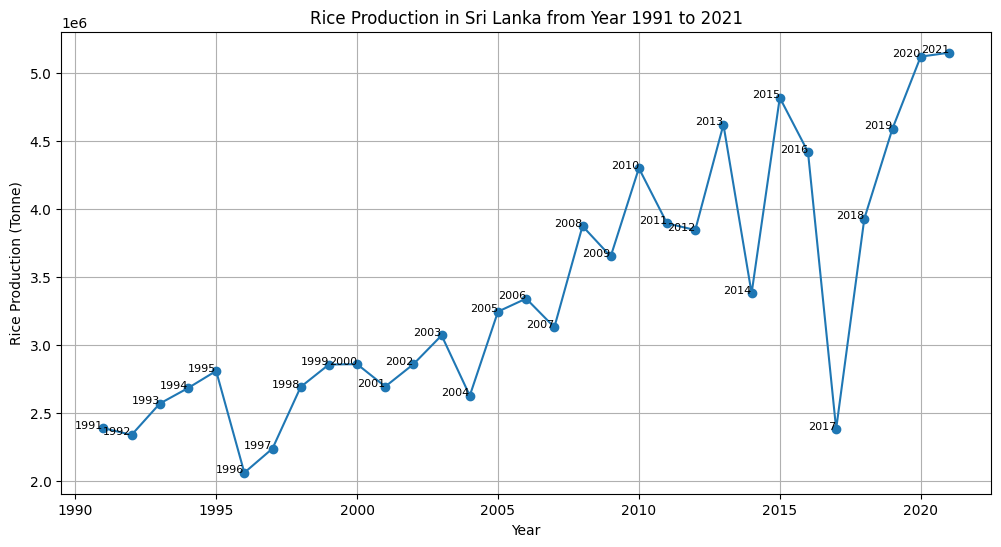

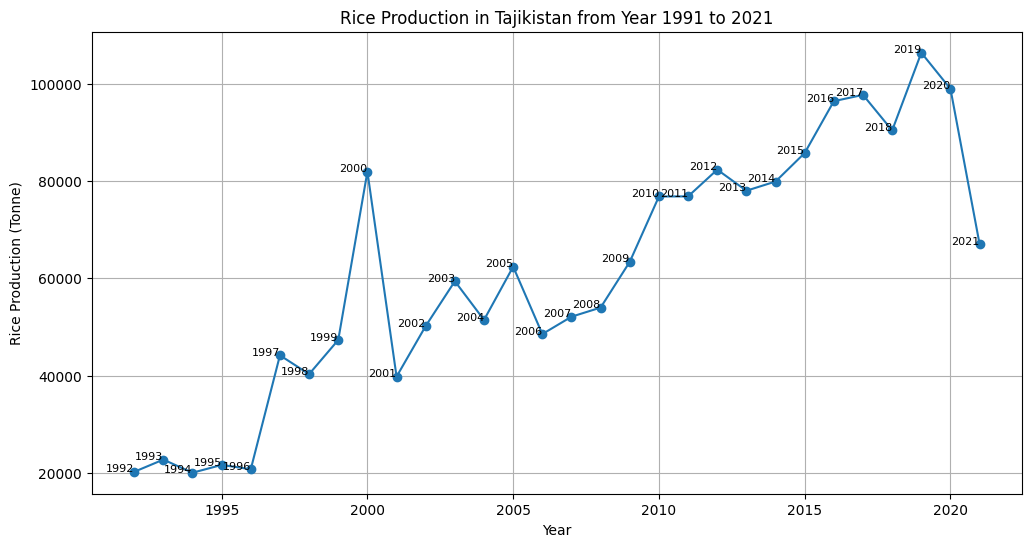

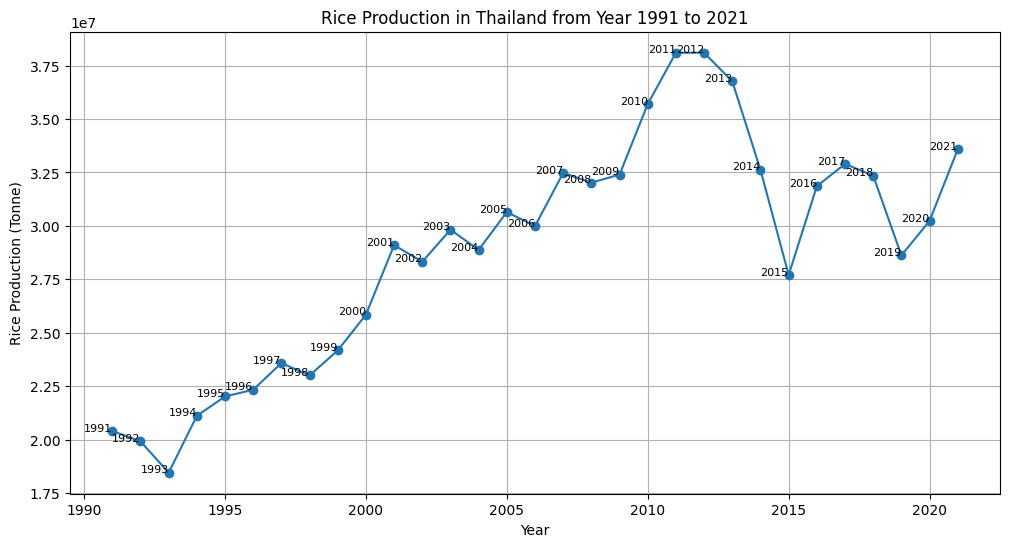

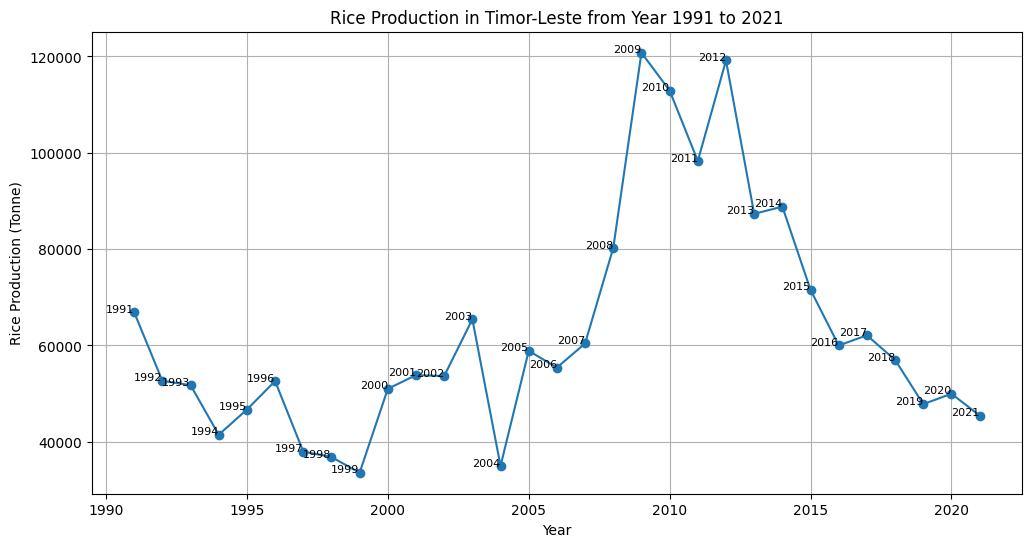

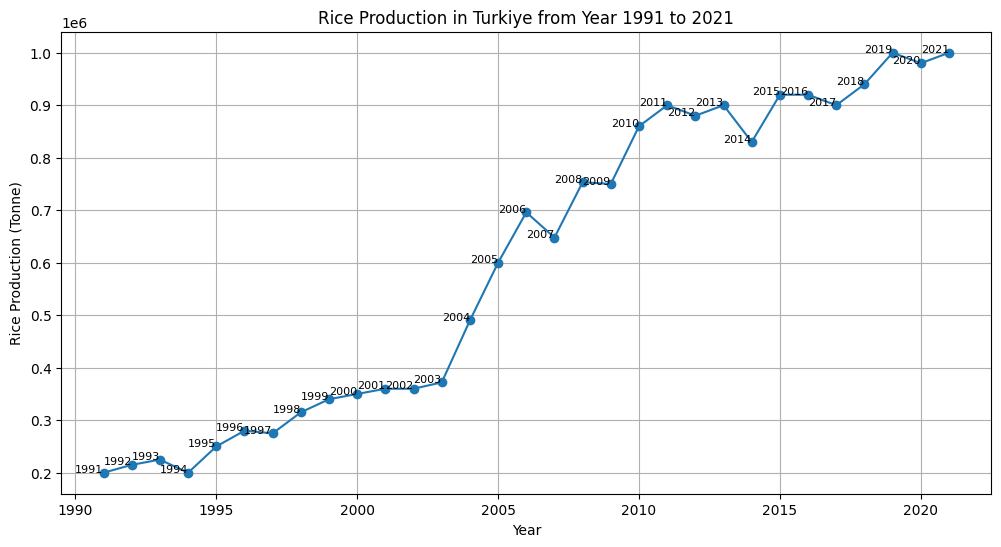

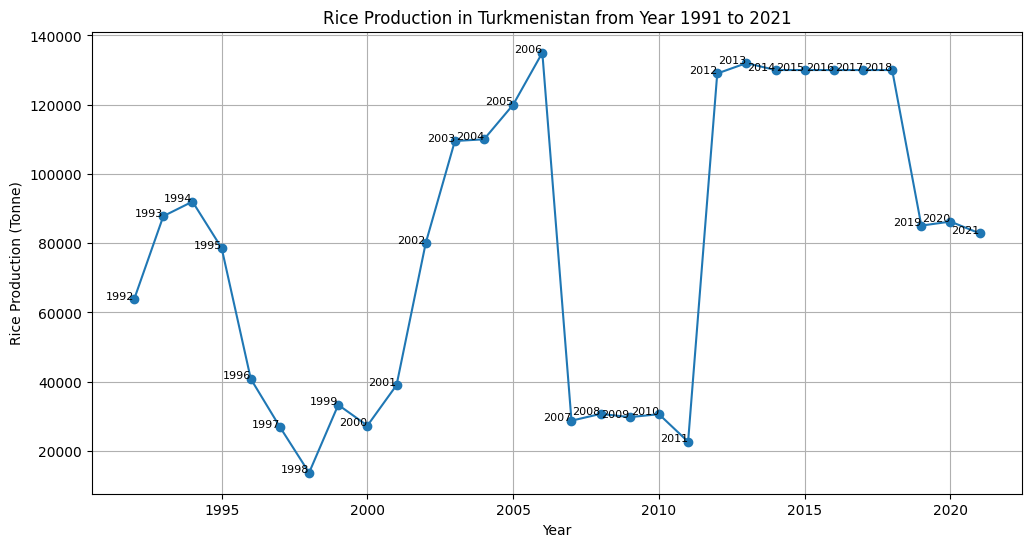

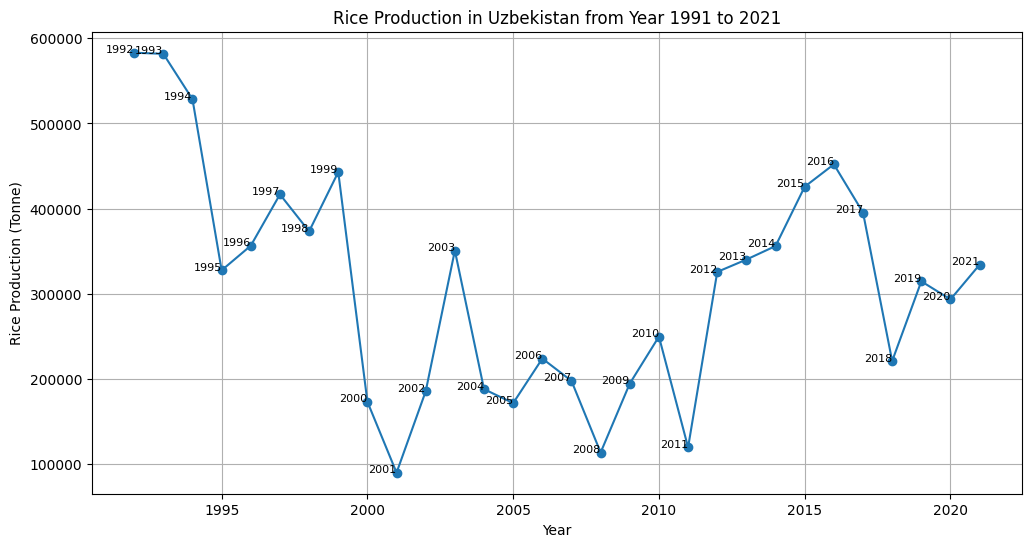

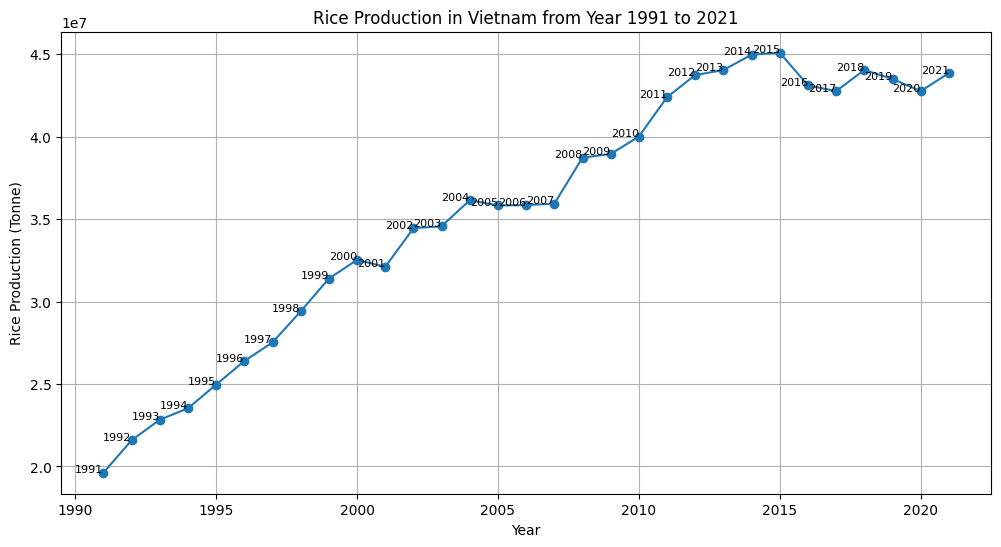

In [9]:
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Year'], country_data['Rice Production(Tonne)'], marker='o', linestyle='-')

    for year, production in zip(country_data['Year'], country_data['Rice Production(Tonne)']):
        plt.text(year, production, str(year), fontsize=8, ha='right')

    plt.xlabel('Year')
    plt.ylabel('Rice Production (Tonne)')
    plt.title(f'Rice Production in {country} from Year 1991 to 2021')
    plt.grid(True)
    plt.show()



Processing country: Afghanistan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

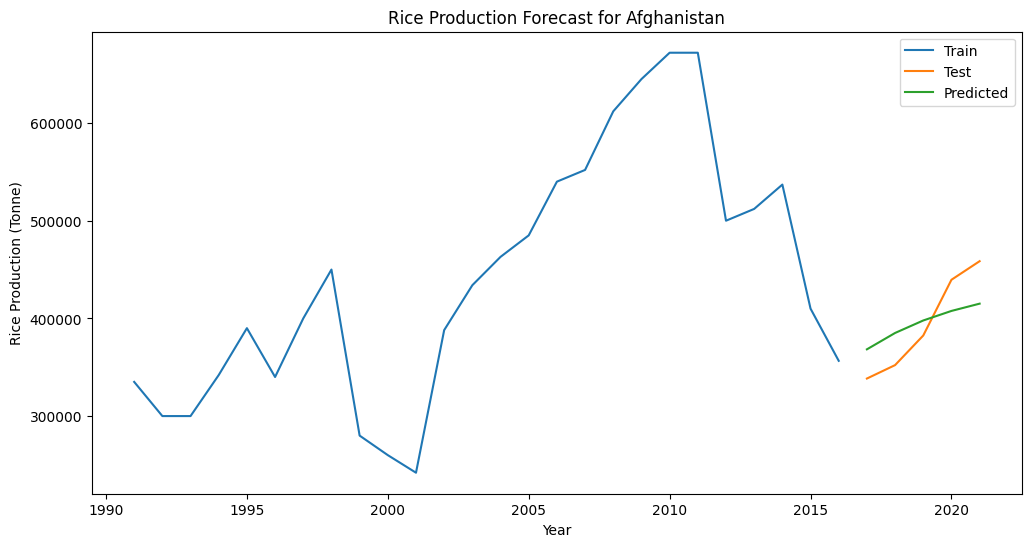

Country: Afghanistan - R²: 0.5433, MSE: 1024291649.1520, RMSE: 32004.5567, MAE: 30712.9300
Processing country: Azerbaijan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

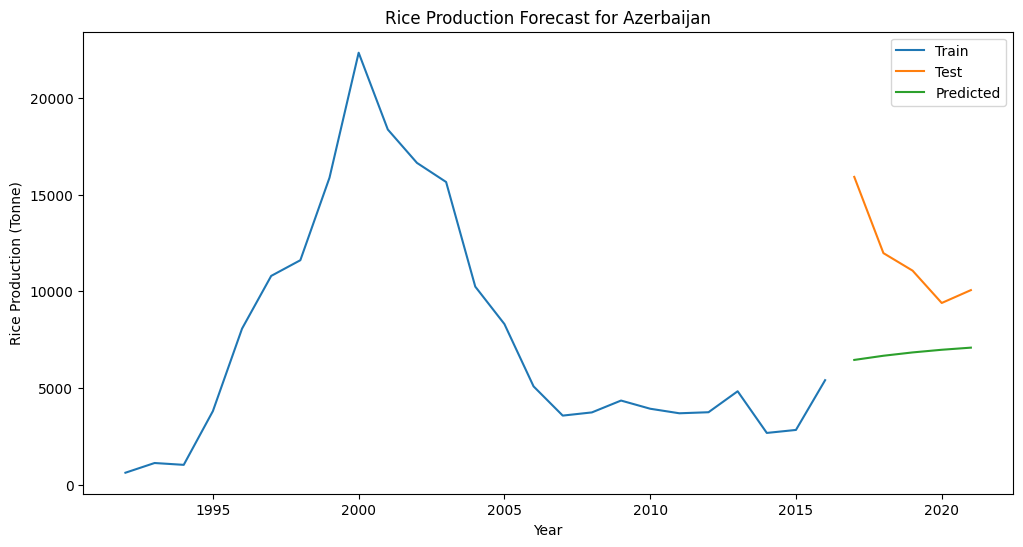

Country: Azerbaijan - R²: -4.7291, MSE: 30052247.3802, RMSE: 5481.9930, MAE: 4877.9026
Processing country: Bangladesh


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

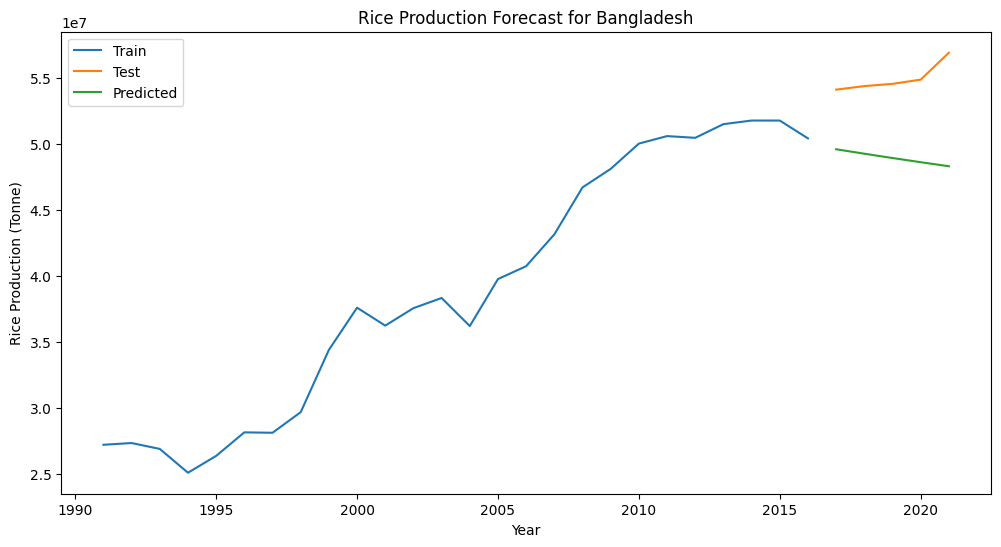

Country: Bangladesh - R²: -37.0556, MSE: 38270346178030.2500, RMSE: 6186303.1107, MAE: 6023469.2817
Processing country: Bhutan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

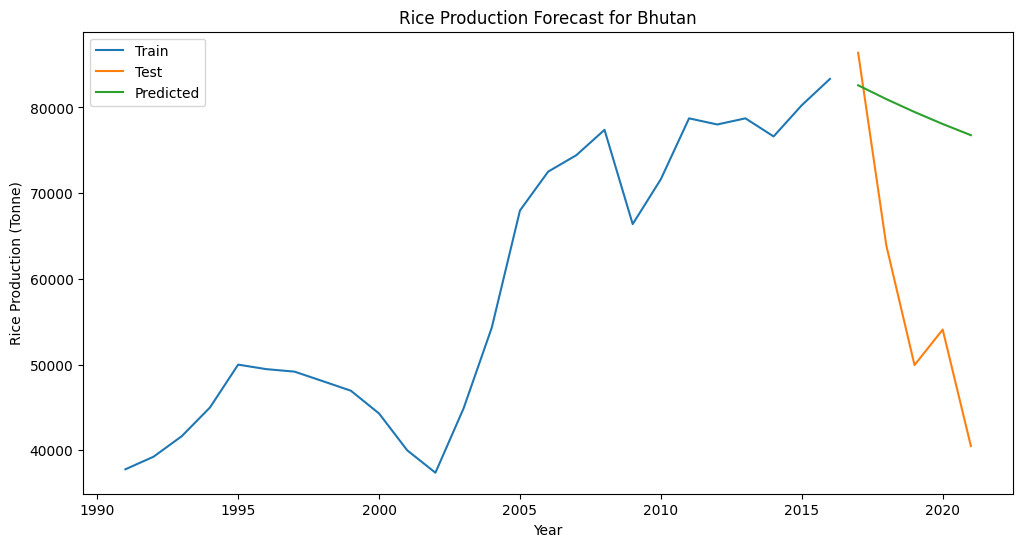

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Country: Bhutan - R²: -1.5107, MSE: 613556810.0238, RMSE: 24770.0789, MAE: 22129.5238
Processing country: Brunei Darussalam


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


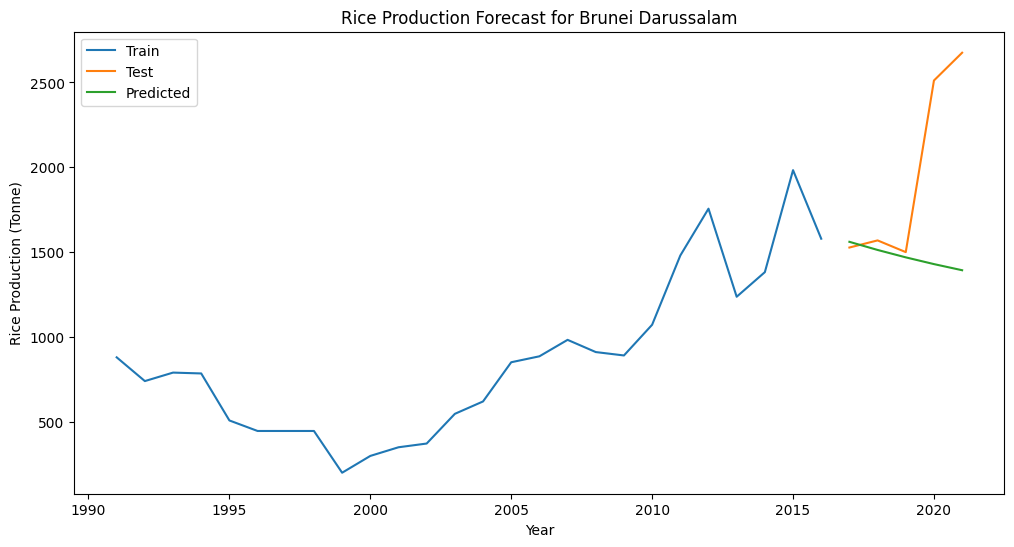

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Asus\AppD

Country: Brunei Darussalam - R²: -1.0618, MSE: 563728.9069, RMSE: 750.8188, MAE: 496.8889
Processing country: Cambodia


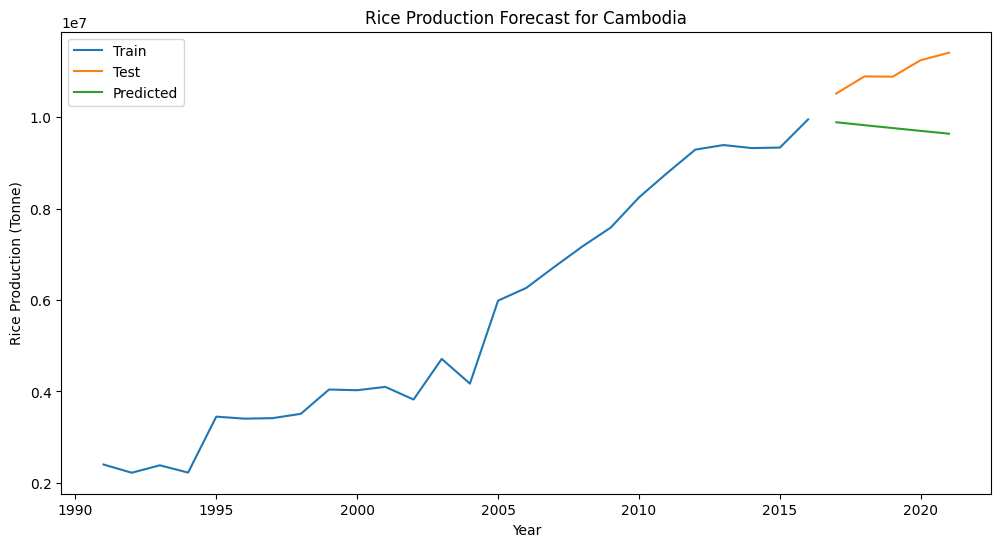

Country: Cambodia - R²: -16.1401, MSE: 1666801234825.2656, RMSE: 1291046.5657, MAE: 1228065.0053
Processing country: Hong Kong


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

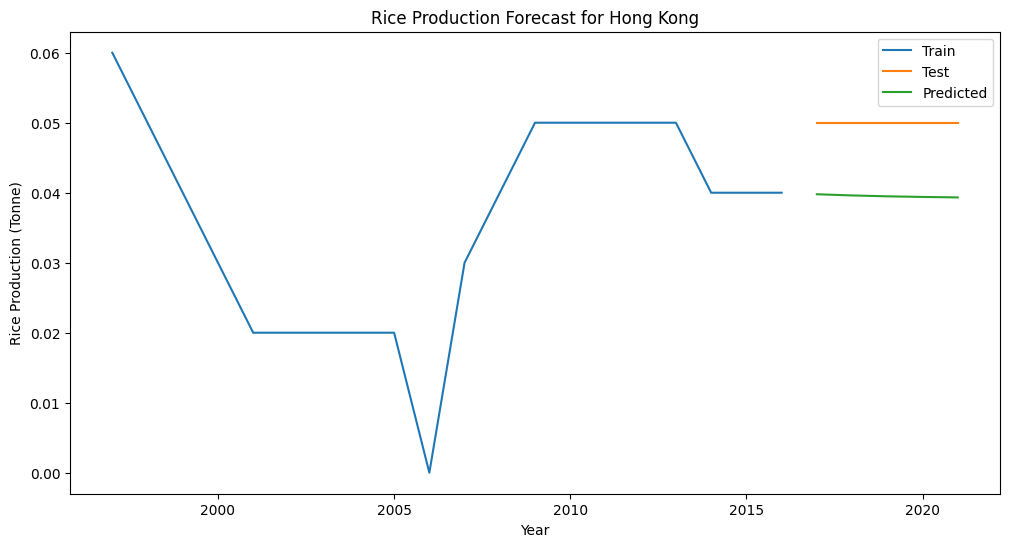

Country: Hong Kong - R²: 0.0000, MSE: 0.0001, RMSE: 0.0105, MAE: 0.0105
Processing country: Taiwan Province of China


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

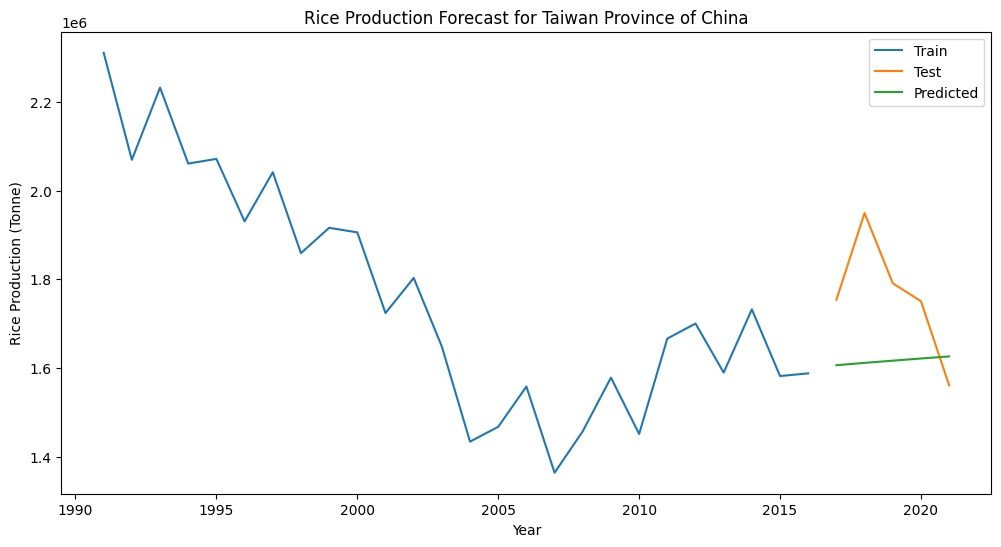

Country: Taiwan Province of China - R²: -1.4478, MSE: 37579564788.0212, RMSE: 193854.4939, MAE: 171112.1307
Processing country: China


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

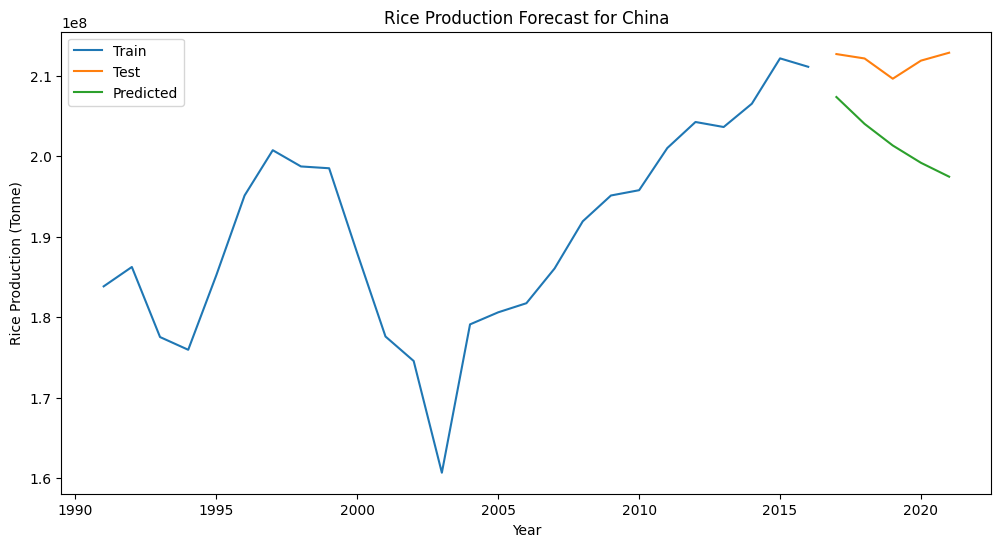

Country: China - R²: -82.3297, MSE: 112370379928268.5312, RMSE: 10600489.6080, MAE: 9972443.3485
Processing country: Democratic People's Republic of Korea


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

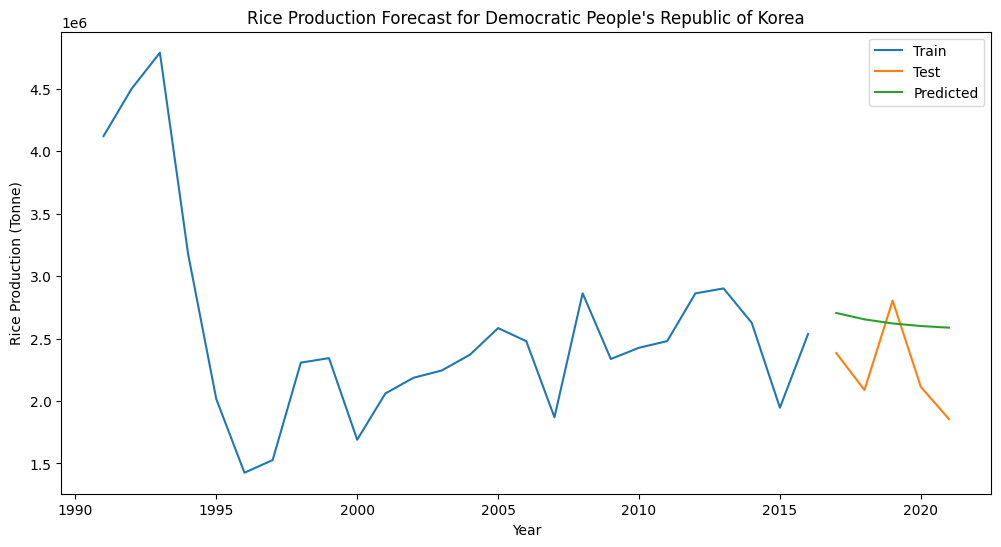

Country: Democratic People's Republic of Korea - R²: -1.3390, MSE: 245886649248.9841, RMSE: 495869.5890, MAE: 457733.1234
Processing country: India


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

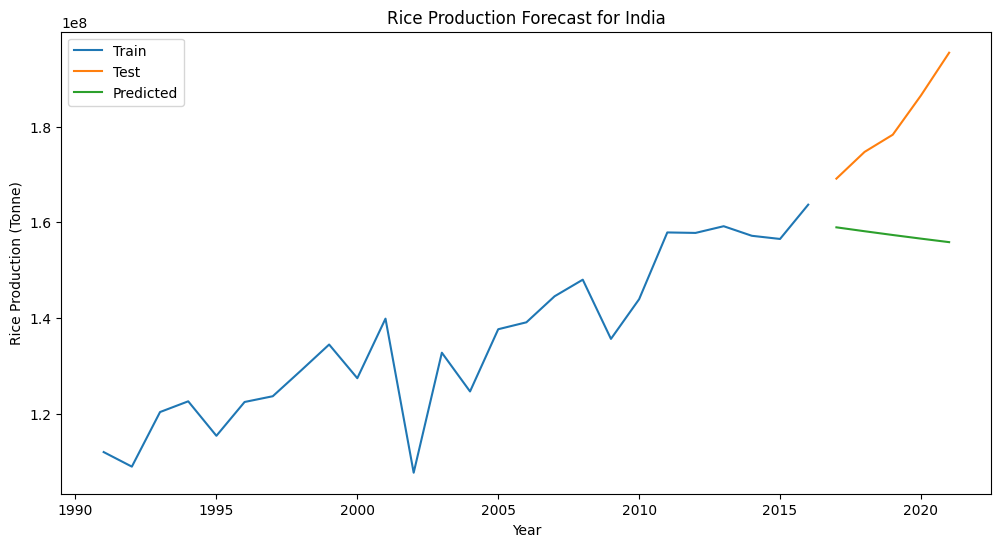

Country: India - R²: -6.6921, MSE: 654823163673297.7500, RMSE: 25589512.7674, MAE: 23423430.2053
Processing country: Indonesia


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

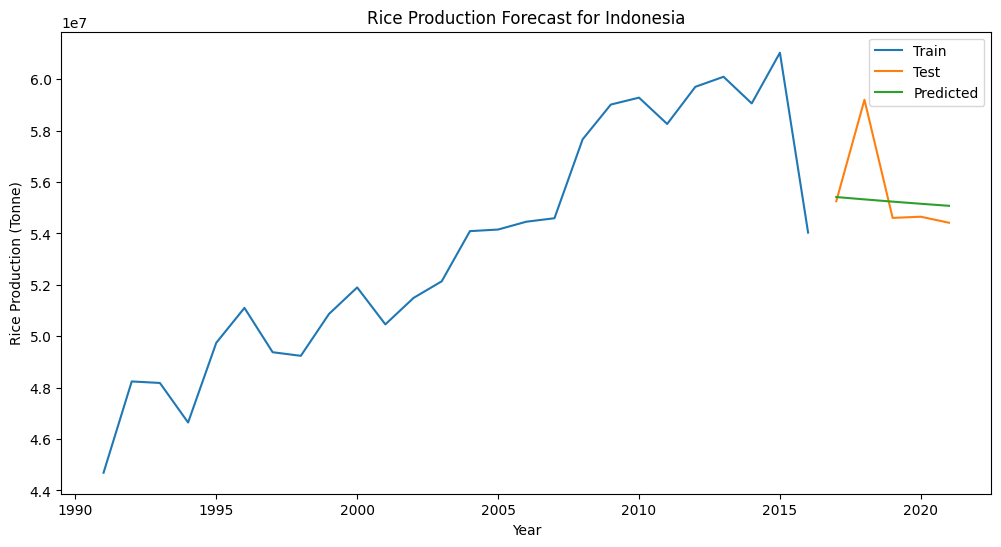

Country: Indonesia - R²: 0.0146, MSE: 3228560672861.6499, RMSE: 1796819.5994, MAE: 1167182.3960
Processing country: Iran


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

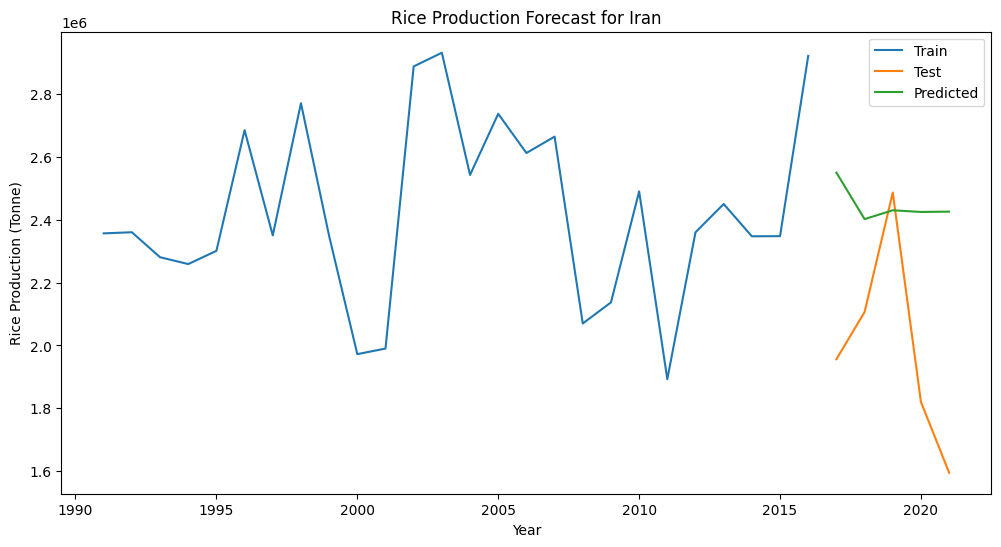

Country: Iran - R²: -2.3602, MSE: 299489417267.6618, RMSE: 547256.2629, MAE: 475999.9531
Processing country: Iraq


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

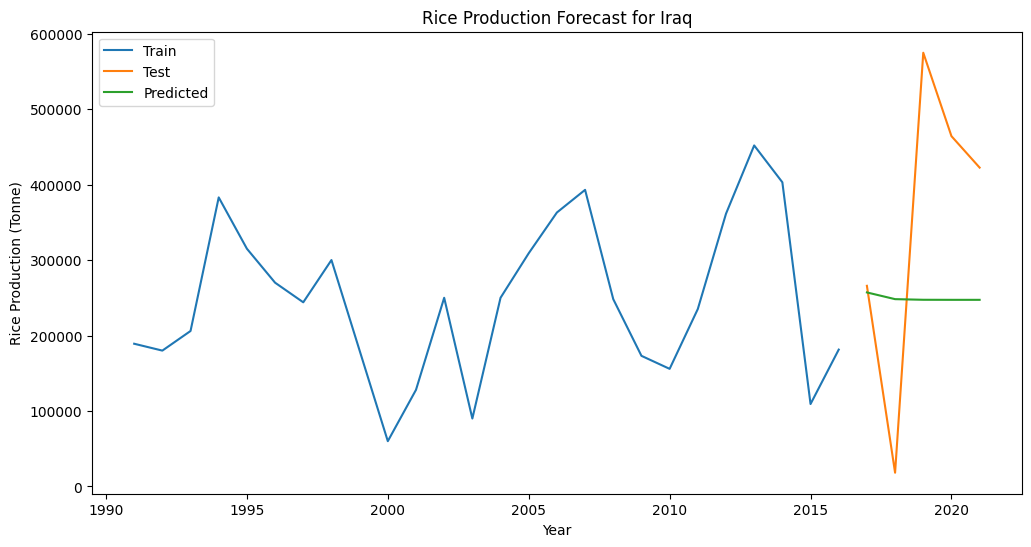

Country: Iraq - R²: -0.2792, MSE: 47571651427.9791, RMSE: 218109.2649, MAE: 191635.1975
Processing country: Japan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Asus\AppD

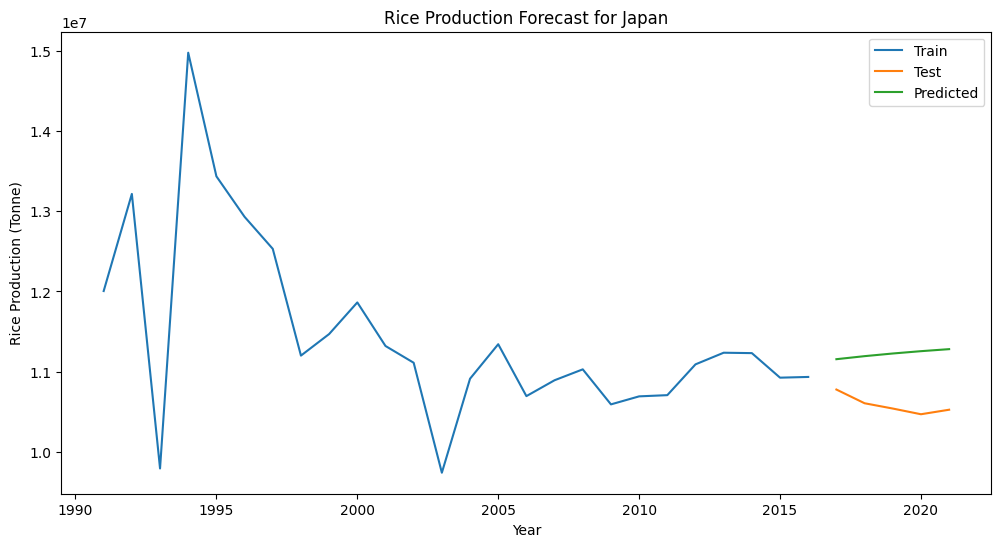

Country: Japan - R²: -37.1318, MSE: 429500503365.4304, RMSE: 655362.8791, MAE: 638660.7750
Processing country: Kazakhstan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

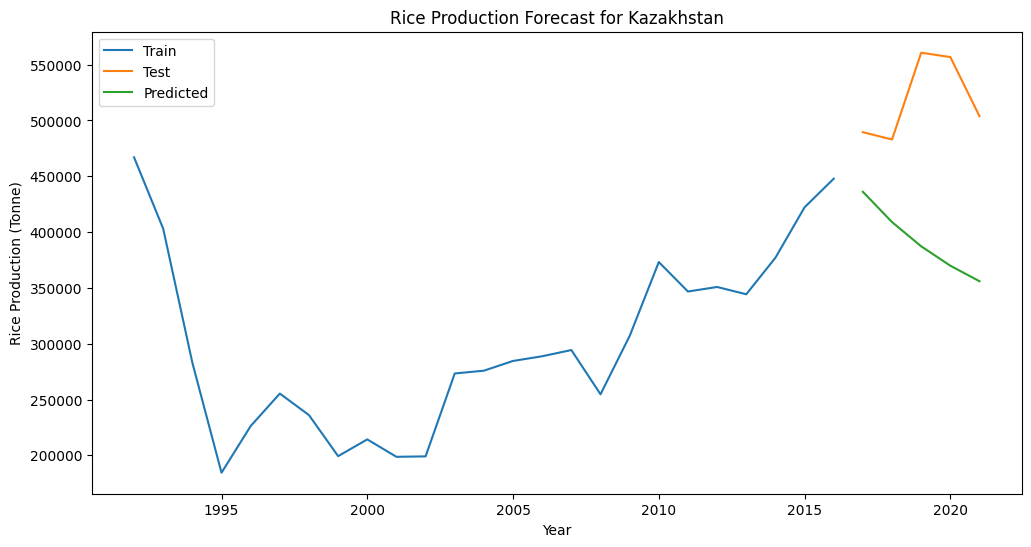

Country: Kazakhstan - R²: -16.0990, MSE: 19033884189.6705, RMSE: 137963.3436, MAE: 127096.5183
Processing country: Kyrgyzstan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

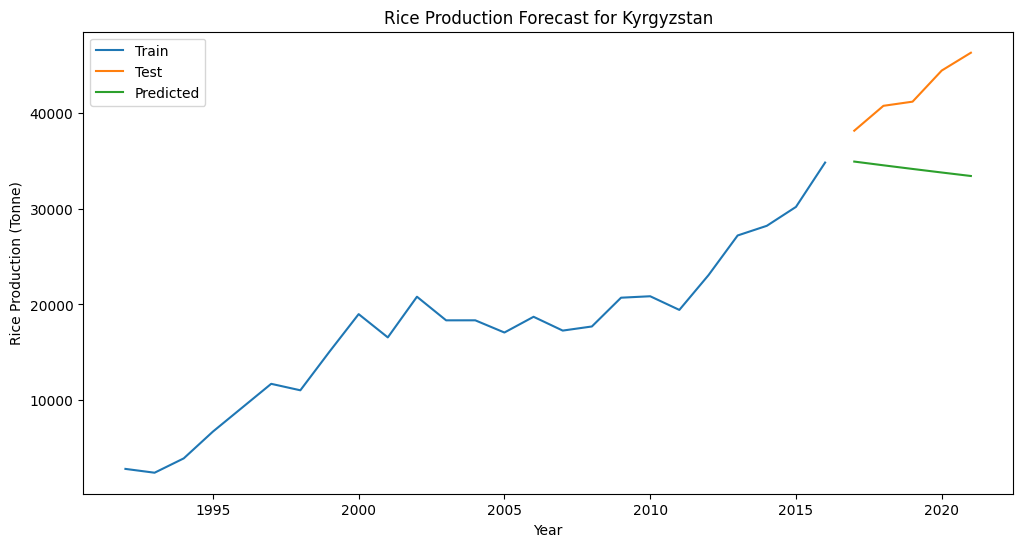

Country: Kyrgyzstan - R²: -8.1436, MSE: 75756305.4970, RMSE: 8703.8098, MAE: 8010.7667
Processing country: Lao People's Democratic Rep.


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Asus\AppD

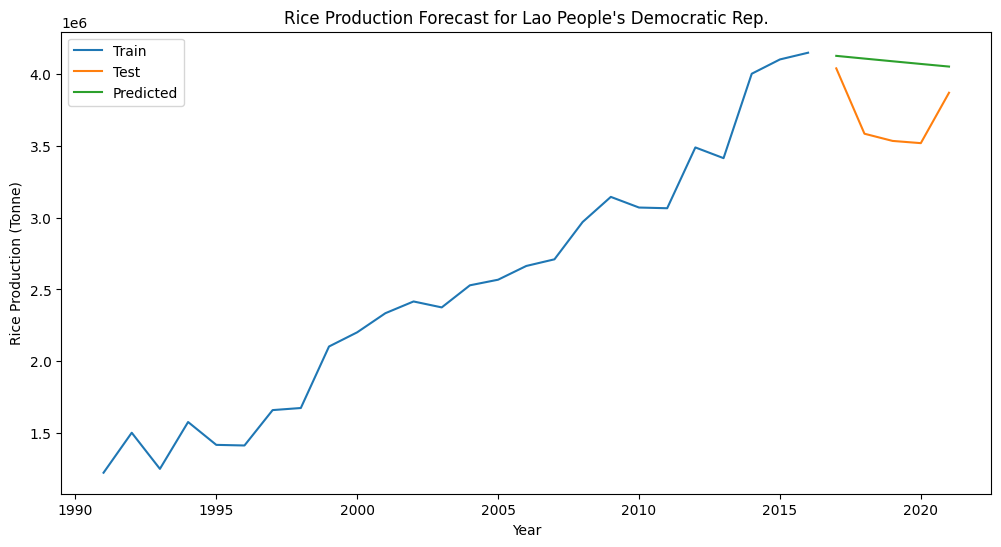

Country: Lao People's Democratic Rep. - R²: -3.2641, MSE: 185314132229.9494, RMSE: 430481.2798, MAE: 379806.4230
Processing country: Malaysia


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Asus\AppD

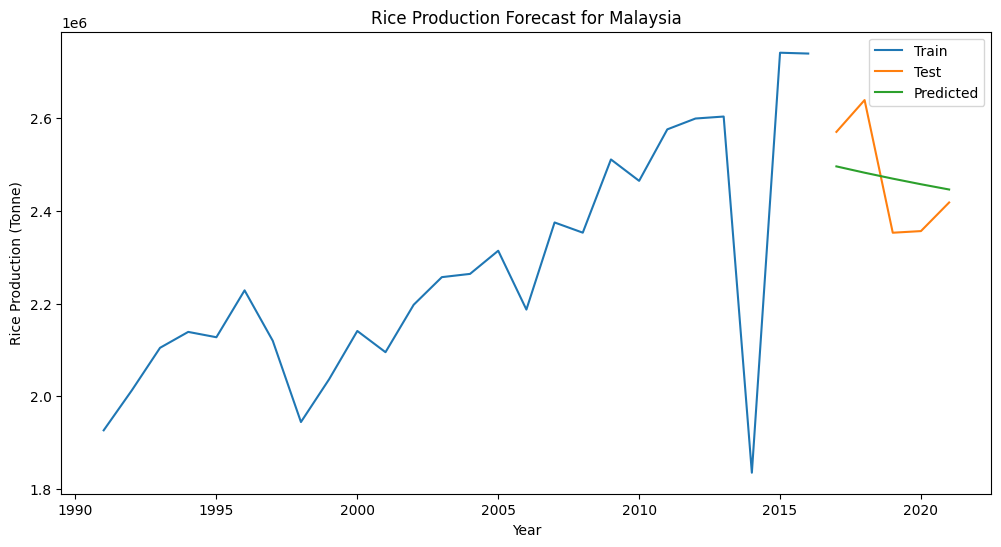

Country: Malaysia - R²: 0.1949, MSE: 10951583935.0287, RMSE: 104649.8157, MAE: 95417.6504
Processing country: Myanmar


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

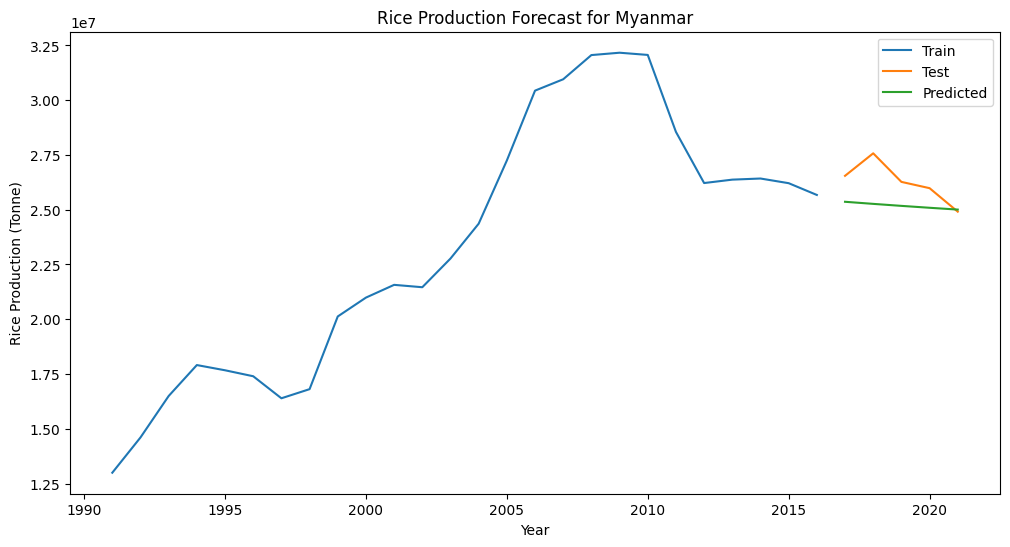

Country: Myanmar - R²: -1.3574, MSE: 1747790641844.1013, RMSE: 1322040.3329, MAE: 1115515.8502
Processing country: Nepal


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

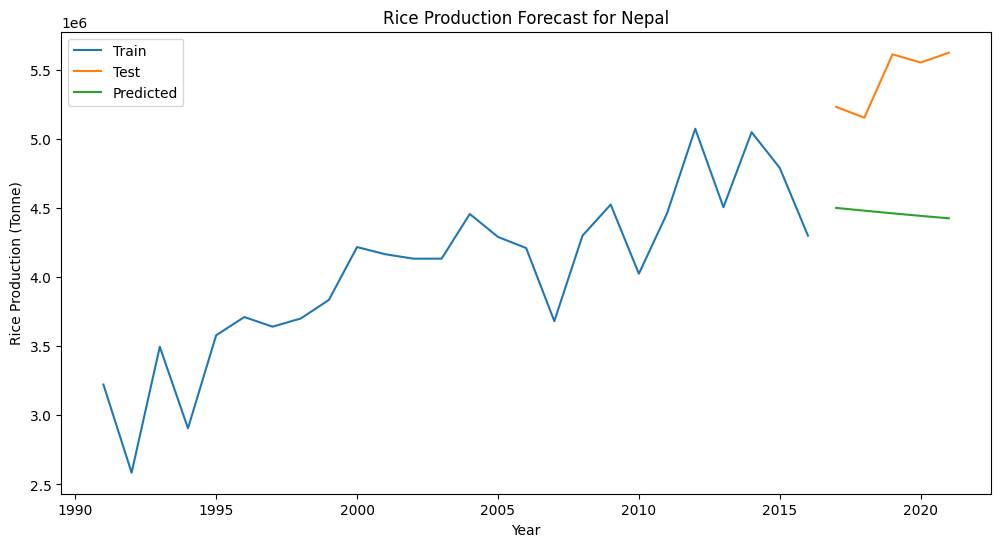

Country: Nepal - R²: -23.7358, MSE: 993978509816.6758, RMSE: 996984.7089, MAE: 971668.8521
Processing country: Pakistan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

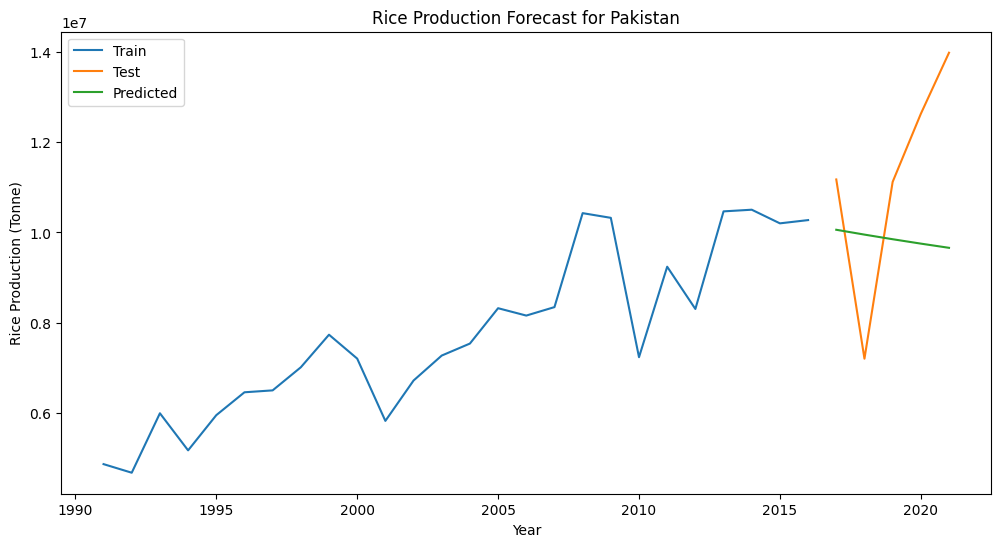

Country: Pakistan - R²: -0.4507, MSE: 7480433840618.2783, RMSE: 2735038.1790, MAE: 2467552.8681
Processing country: Philippines


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

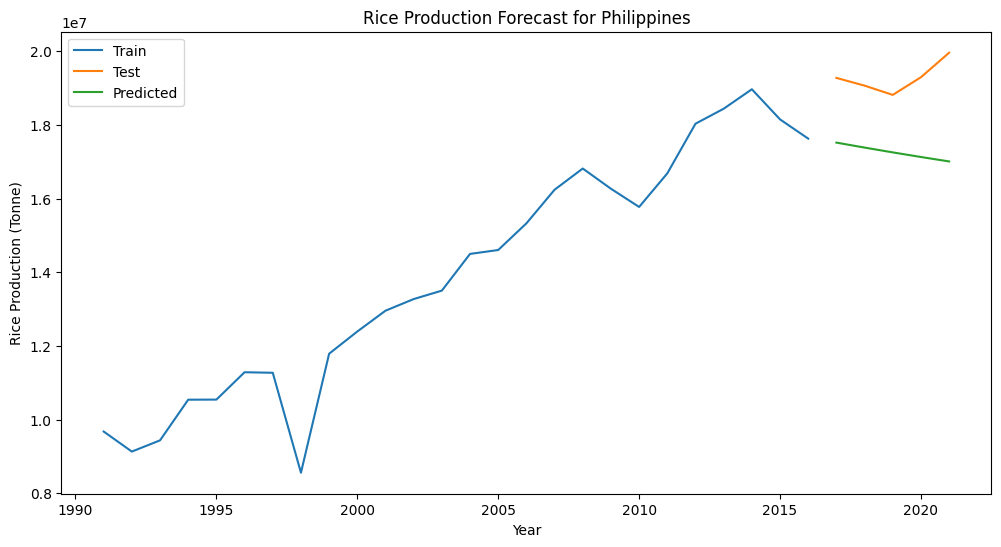

Country: Philippines - R²: -29.0216, MSE: 4352990666173.0986, RMSE: 2086382.1956, MAE: 2023863.6294
Processing country: Republic of Korea


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

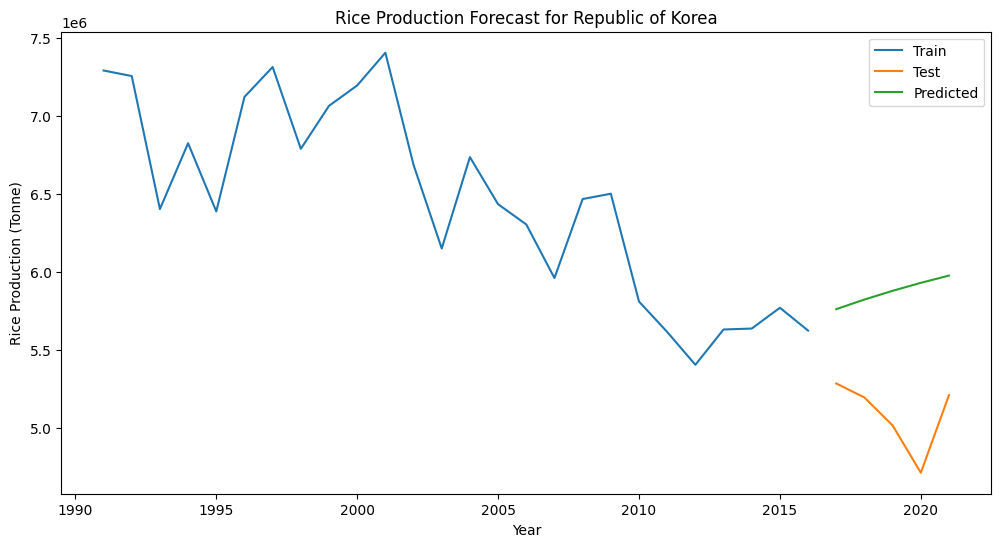

Country: Republic of Korea - R²: -15.2701, MSE: 687614670587.4636, RMSE: 829225.3437, MAE: 790551.9314
Processing country: Saudi Arabia
Not enough data for Saudi Arabia to perform train-test split.
Processing country: Sri Lanka


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Asus\AppD

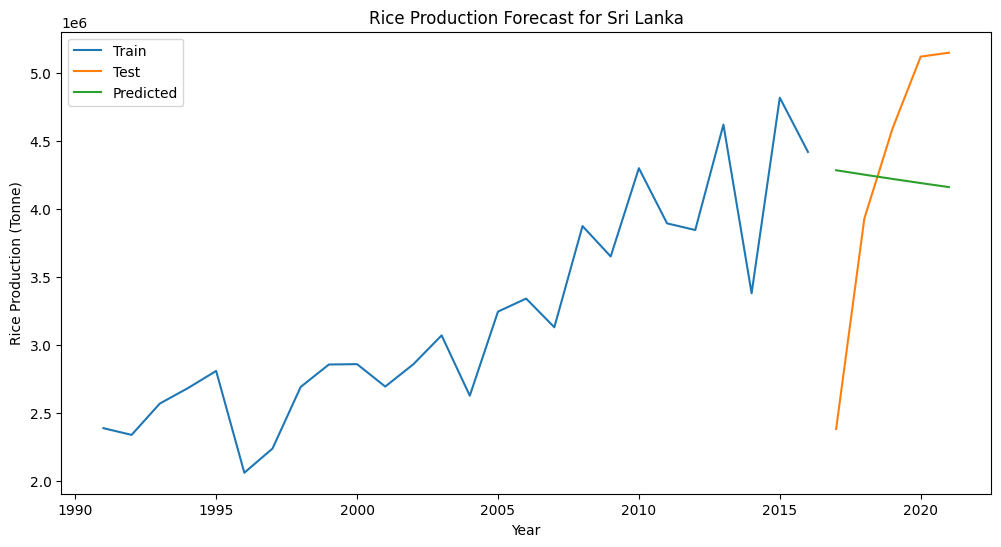

Country: Sri Lanka - R²: -0.0815, MSE: 1140208100044.8430, RMSE: 1067805.2725, MAE: 902735.7621
Processing country: Tajikistan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

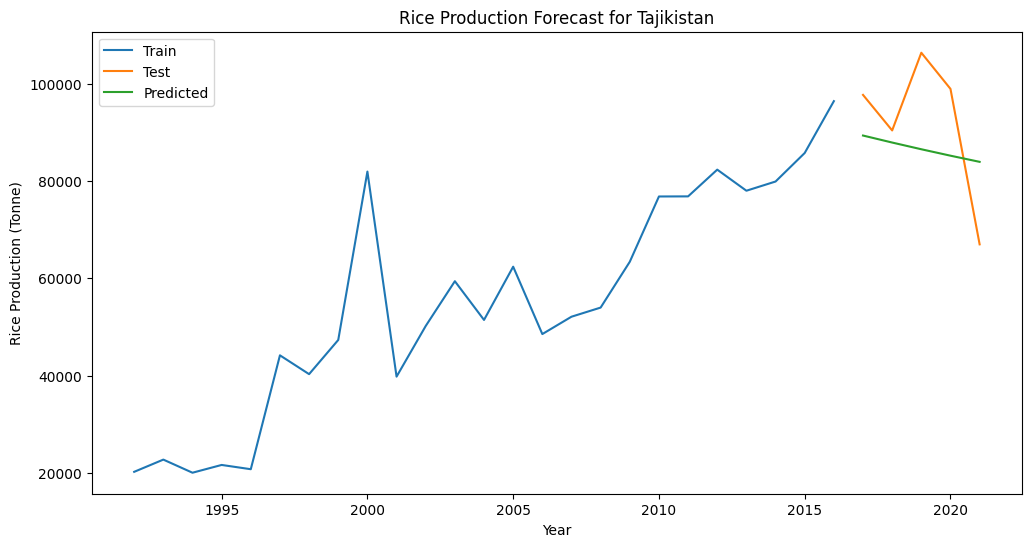

Country: Tajikistan - R²: -0.0329, MSE: 189669257.6821, RMSE: 13772.0462, MAE: 12290.9386
Processing country: Thailand


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

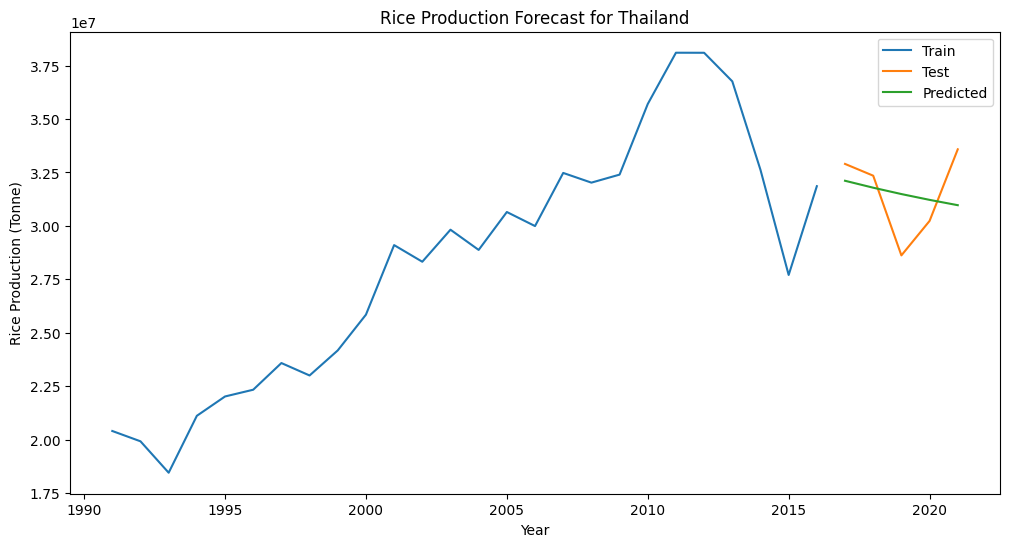

Country: Thailand - R²: -0.0037, MSE: 3396906906935.1680, RMSE: 1843069.9680, MAE: 1564235.8961
Processing country: Timor-Leste


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

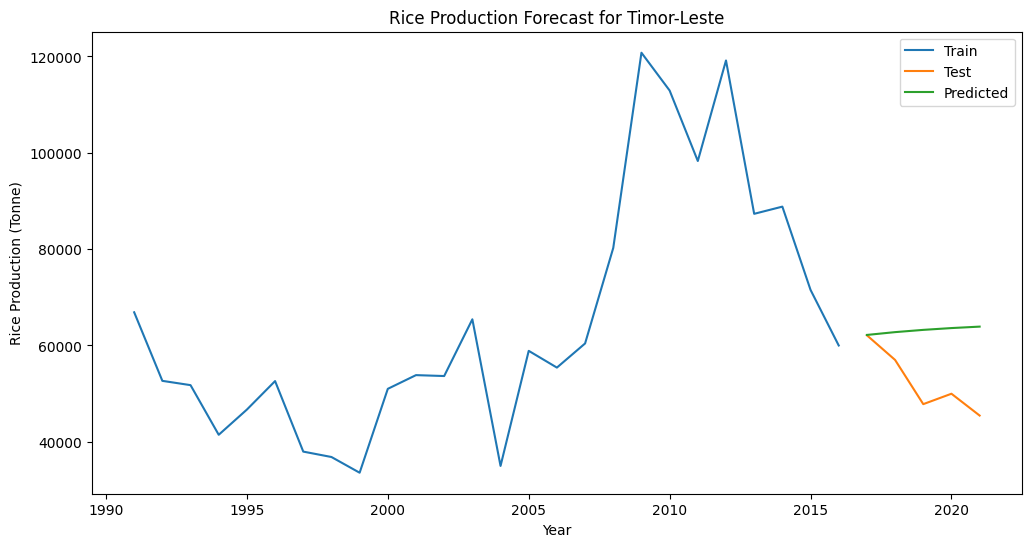

Country: Timor-Leste - R²: -3.1860, MSE: 159520014.2936, RMSE: 12630.1233, MAE: 10670.9564
Processing country: Turkiye


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

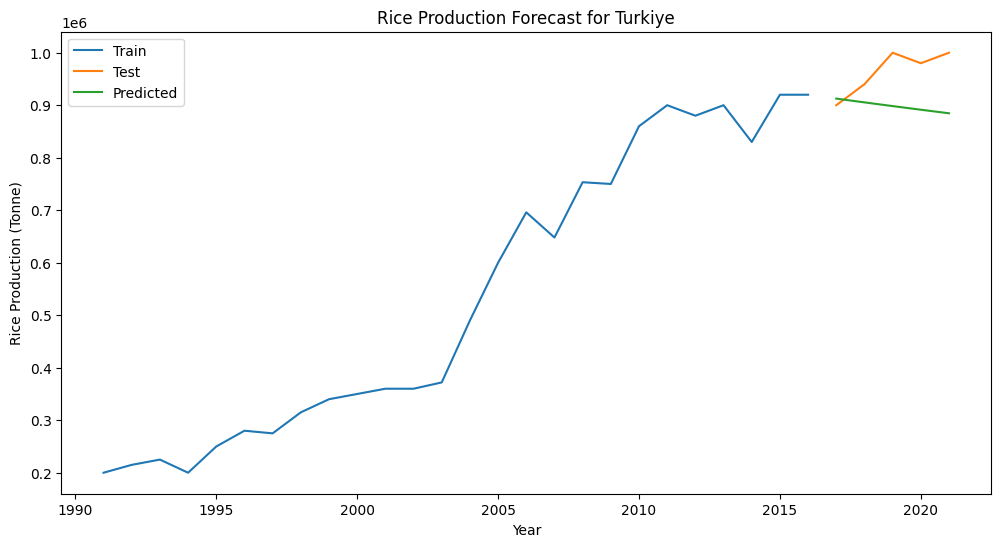

Country: Turkiye - R²: -3.3672, MSE: 6568209520.2586, RMSE: 81044.4910, MAE: 70553.6045
Processing country: Turkmenistan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

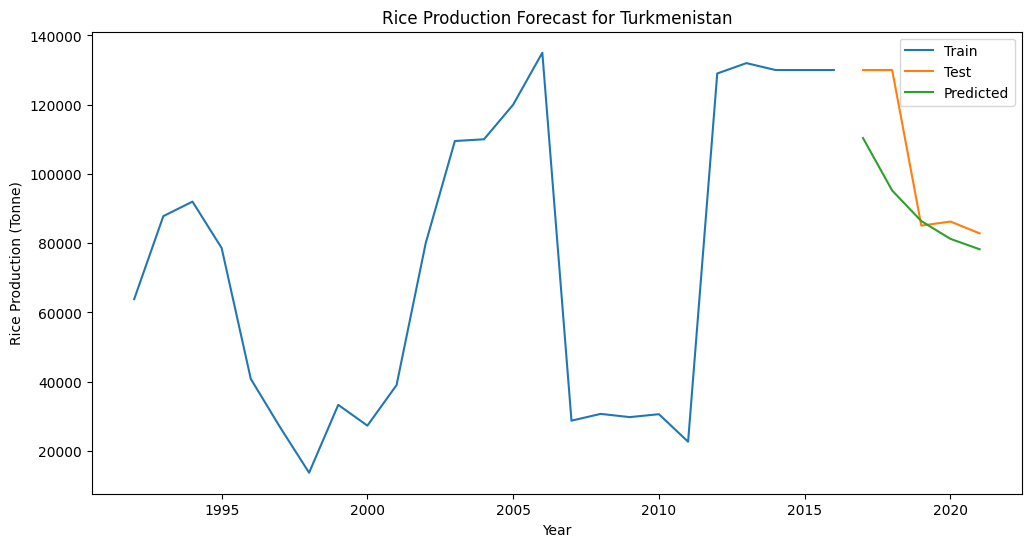

Country: Turkmenistan - R²: 0.3333, MSE: 328983686.9204, RMSE: 18137.9075, MAE: 13070.4691
Processing country: Uzbekistan


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

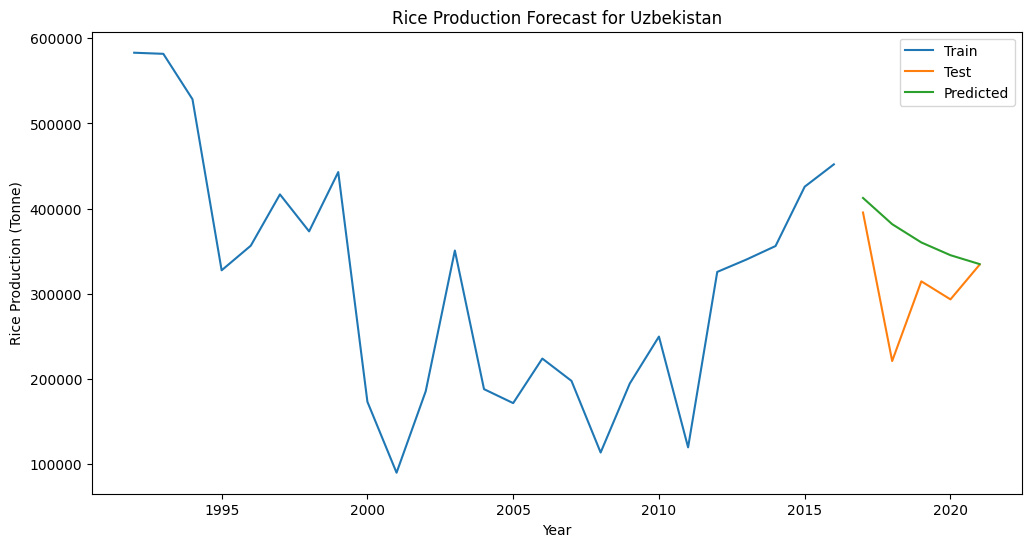

Country: Uzbekistan - R²: -0.9217, MSE: 6176012924.8066, RMSE: 78587.6130, MAE: 55184.0194
Processing country: Vietnam


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Asus\AppData\Local\Prog

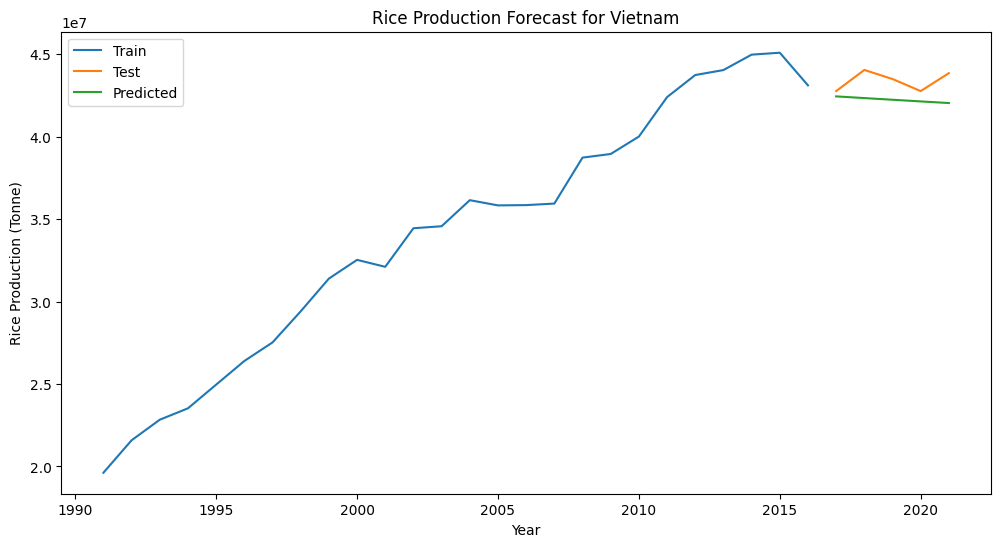

Country: Vietnam - R²: -4.7534, MSE: 1655434305855.4421, RMSE: 1286636.8197, MAE: 1144965.6274

Overall Results:
Afghanistan: MSE = 1024291649.1520, R^2 = 0.5433, MAE = 30712.9300, RMSE = 32004.5567
Azerbaijan: MSE = 30052247.3802, R^2 = -4.7291, MAE = 4877.9026, RMSE = 5481.9930
Bangladesh: MSE = 38270346178030.2500, R^2 = -37.0556, MAE = 6023469.2817, RMSE = 6186303.1107
Bhutan: MSE = 613556810.0238, R^2 = -1.5107, MAE = 22129.5238, RMSE = 24770.0789
Brunei Darussalam: MSE = 563728.9069, R^2 = -1.0618, MAE = 496.8889, RMSE = 750.8188
Cambodia: MSE = 1666801234825.2656, R^2 = -16.1401, MAE = 1228065.0053, RMSE = 1291046.5657
Hong Kong: MSE = 0.0001, R^2 = 0.0000, MAE = 0.0105, RMSE = 0.0105
Taiwan Province of China: MSE = 37579564788.0212, R^2 = -1.4478, MAE = 171112.1307, RMSE = 193854.4939
China: MSE = 112370379928268.5312, R^2 = -82.3297, MAE = 9972443.3485, RMSE = 10600489.6080
Democratic People's Republic of Korea: MSE = 245886649248.9841, R^2 = -1.3390, MAE = 457733.1234, RMSE =

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Get the list of countries
countries = df['Country'].unique()

# Initialize a dictionary to store results
results = {}

# Loop through each country
for country in countries:
    print(f"Processing country: {country}")
    
    # Filter the data for the current country
    country_data = df[df['Country'] == country].copy()
    
    # Set 'Year' as index if not already set
    if 'Year' in country_data.columns:
        country_data.set_index('Year', inplace=True)
    
    # Check if there is enough data for train-test split
    if len(country_data) > 5:
        train = country_data.iloc[:-5]
        test = country_data.iloc[-5:]
        
        # Fit the ARIMA model on the training data
        try:
            model = ARIMA(train['Rice Production(Tonne)'], order=(1, 0, 1))
            model_fit = model.fit()
        
            # Make predictions
            predictions = model_fit.forecast(steps=len(test))
            
            # Evaluate the model
            mse = mean_squared_error(test['Rice Production(Tonne)'], predictions)
            r2 = r2_score(test['Rice Production(Tonne)'], predictions)
            mae = mean_absolute_error(test['Rice Production(Tonne)'], predictions)
            rmse = np.sqrt(mse)
            results[country] = {
                'MSE': mse, 
                'R^2': r2, 
                'MAE': mae, 
                'RMSE': rmse, 
                'Actual': test['Rice Production(Tonne)'].tolist(), 
                'Predicted': predictions.tolist()
            }
            
            # Plot the results
            plt.figure(figsize=(12, 6))
            plt.plot(train['Rice Production(Tonne)'], label='Train')
            plt.plot(test['Rice Production(Tonne)'], label='Test')
            plt.plot(test.index, predictions, label='Predicted')
            plt.xlabel('Year')
            plt.ylabel('Rice Production (Tonne)')
            plt.title(f'Rice Production Forecast for {country}')
            plt.legend()
            plt.show()
            
            # Print evaluation metrics
            print(f'Country: {country} - R²: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}')
                    
        except Exception as e:
            print(f"An error occurred for {country}: {e}")
    else:
        print(f"Not enough data for {country} to perform train-test split.")

print("\nOverall Results:")
for country, result in results.items():
    print(f"{country}: MSE = {result['MSE']:.4f}, R^2 = {result['R^2']:.4f}, MAE = {result['MAE']:.4f}, RMSE = {result['RMSE']:.4f}")
